# Attribute Information

## Input features in order :

#### 1) CRIM - per capita crime rate by town
#### 2) ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#### 3) INDUS - proportion of non-retail business acres per town
#### 4) CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#### 5) NOX - nitric oxides concentration (parts per 10 million) [parts/10M]
#### 6) RM - average number of rooms per dwelling
#### 7) AGE - proportion of owner-occupied units built prior to 1940
#### 8) DIS - weighted distances to five Boston employment centres
#### 9) RAD - index of accessibility to radial highways
#### 10) TAX - full-value property-tax rate per $10,000 [$/10k]
#### 11) PTRATIO - pupil-teacher ratio by town
#### 12) B - The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### 13) LSTAT - % lower status of the population

## Output variable:
#### 1) MEDV - Median value of owner-occupied homes in $1000's [k$]

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
file_data = 'D:\\Sourav_Singh\\Excell ,SQL & Tableau\\Project_to_make\\boston_house_price.csv'
Data = pd.read_csv(file_data)

In [3]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


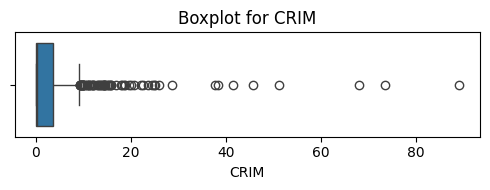

Column : CRIM
Q1 : 0.08204499999999999, Q3 : 3.6770825, IQR : 3.5950375
Number of outliers in CRIM : 66




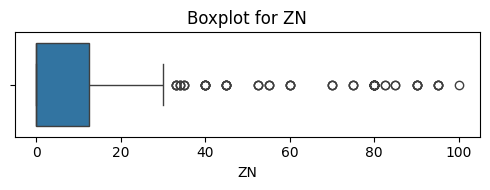

Column : ZN
Q1 : 0.0, Q3 : 12.5, IQR : 12.5
Number of outliers in ZN : 68




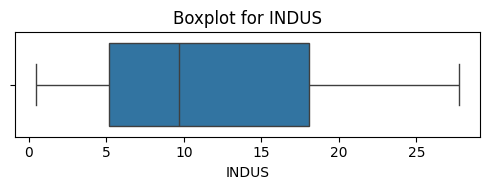

Column : INDUS
Q1 : 5.19, Q3 : 18.1, IQR : 12.91
Number of outliers in INDUS : 0




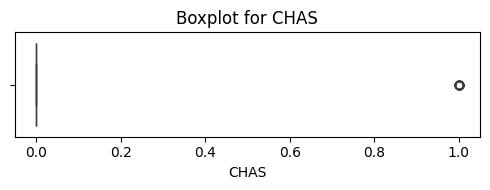

Column : CHAS
Q1 : 0.0, Q3 : 0.0, IQR : 0.0
Number of outliers in CHAS : 35




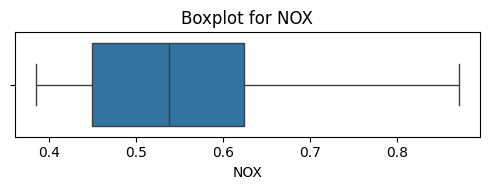

Column : NOX
Q1 : 0.449, Q3 : 0.624, IQR : 0.175
Number of outliers in NOX : 0




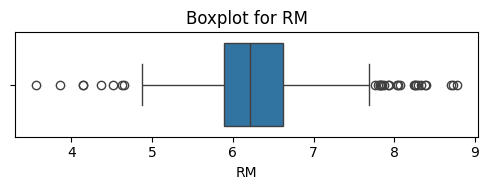

Column : RM
Q1 : 5.8854999999999995, Q3 : 6.6235, IQR : 0.7380000000000004
Number of outliers in RM : 30




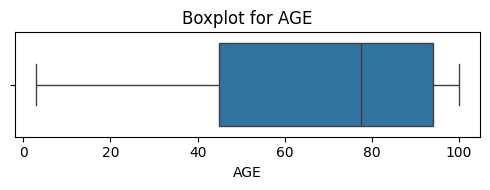

Column : AGE
Q1 : 45.025, Q3 : 94.07499999999999, IQR : 49.04999999999999
Number of outliers in AGE : 0




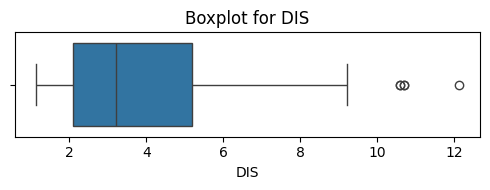

Column : DIS
Q1 : 2.100175, Q3 : 5.1884250000000005, IQR : 3.0882500000000004
Number of outliers in DIS : 5




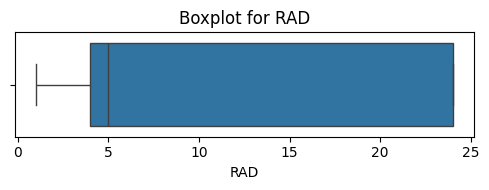

Column : RAD
Q1 : 4.0, Q3 : 24.0, IQR : 20.0
Number of outliers in RAD : 0




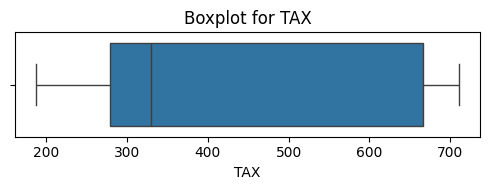

Column : TAX
Q1 : 279.0, Q3 : 666.0, IQR : 387.0
Number of outliers in TAX : 0




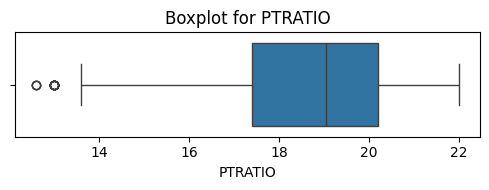

Column : PTRATIO
Q1 : 17.4, Q3 : 20.2, IQR : 2.8000000000000007
Number of outliers in PTRATIO : 15




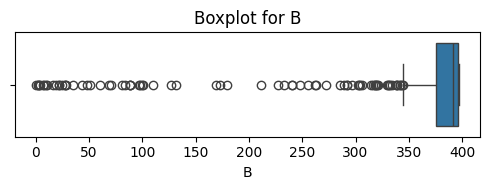

Column : B
Q1 : 375.3775, Q3 : 396.225, IQR : 20.847500000000025
Number of outliers in B : 77




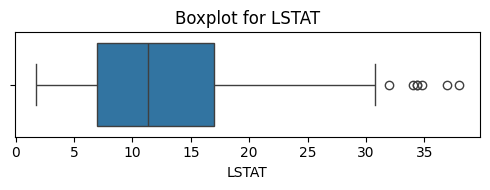

Column : LSTAT
Q1 : 6.949999999999999, Q3 : 16.955000000000002, IQR : 10.005000000000003
Number of outliers in LSTAT : 7




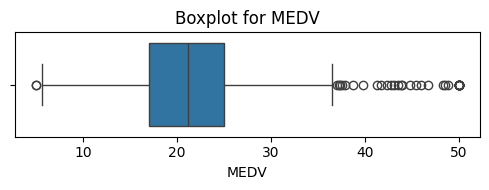

Column : MEDV
Q1 : 17.025, Q3 : 25.0, IQR : 7.975000000000001
Number of outliers in MEDV : 40


In [5]:
# List of numerical columns to calculate IQR 
numerical_columns = Data.select_dtypes(include=['int', 'float']).columns

# To calculate IQR and identify outliers 
def detect_outliers_iqr(data, clmn):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[clmn].quantile(0.25)
    Q3 = data[clmn].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[clmn] < lower_bound) | (data[clmn] > upper_bound)]
    
    return Q1, Q3, IQR, outliers

# calculate IQR, detect outliers
for col in numerical_columns:
    Q1, Q3, IQR, outliers = detect_outliers_iqr(Data, col)

    print( "\n" )
    # Boxplot to visualize the outliers
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=Data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()    
    
    print(f"Column : {col}")
    print(f"Q1 : {Q1}, Q3 : {Q3}, IQR : {IQR}")
    print(f"Number of outliers in {col} : {len(outliers)}")

In [6]:
# calculate IQR and filter out rows with outliers
def remove_outliers_iqr(data, clmn):
    # Q1 and Q3 
    Q1 = data[clmn].quantile(0.25)
    Q3 = data[clmn].quantile(0.75)
    
    # Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Setting up bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keeping only the rows within the bounds (without outliers)
    Data_no_outliers = data[(data[clmn] >= lower_bound) & (data[clmn] <= upper_bound)]
    
    return Data_no_outliers

# copy of the dataset so we can modify it safely
Data_no_outliers = Data.copy()

# Remove outliers
for col in numerical_columns:
    Data_no_outliers = remove_outliers_iqr(Data_no_outliers, col)

In [7]:
# Print the number of rows removed
print(f"Removed {len(Data) - len(Data_no_outliers)} outliers.")

# Display initial dataset shape
print("Dataset shape before removing outliers :", Data.shape)

# Display cleaned dataset shape
print("Dataset shape after removing outliers :", Data_no_outliers.shape)

# Calculate the percentage of removed outliers
removed_percentage = ((Data.shape[0] - Data_no_outliers.shape[0]) / Data.shape[0]) * 100

print(f"Percentage of outliers removed : {removed_percentage:.2f} %")

Removed 292 outliers.
Dataset shape before removing outliers : (506, 14)
Dataset shape after removing outliers : (214, 14)
Percentage of outliers removed : 57.71 %


In [8]:
# Initialize lists to store column names with and without outliers
columns_with_outliers = []
columns_without_outliers = []

# Calculate IQR, detect outliers, and identify columns with/without outliers
for col in numerical_columns:
    Q1, Q3, IQR, outliers = detect_outliers_iqr(Data, col)
    
    if len(outliers) > 0:
        columns_with_outliers.append(col)
    else:
        columns_without_outliers.append(col)

# Print column names with outliers
print("\nColumns with outliers :")
print(columns_with_outliers)

# Print column names without outliers
print("\nColumns without outliers :")
print(columns_without_outliers)


Columns with outliers :
['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Columns without outliers :
['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']


In [9]:
# select columns to apply log transformation
Data[columns_with_outliers] = np.log1p(Data[columns_with_outliers])

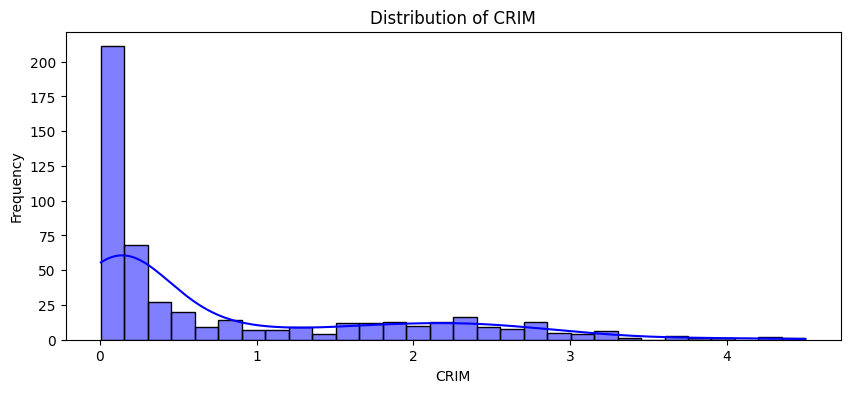

Analysis for 'CRIM':
Unique Values Count : 504
Unique Values Count : CRIM
0.014898    2
2.730053    2
0.034073    1
0.030655    1
0.030034    1
           ..
0.923870    1
1.041608    1
0.901526    1
0.821303    1
0.046320    1
Name: count, Length: 504, dtype: int64

Mean Value : 0.81
Median Value : 0.23
Mode (Most Frequent Value) : 0.01
Variance : 1.05
Standard Deviation : 1.02
------------------------------------------------------------------------------------------




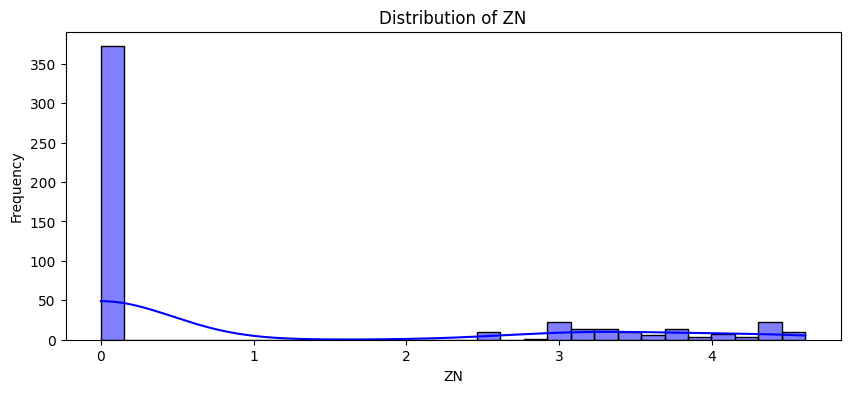

Analysis for 'ZN':
Unique Values Count : 26
Unique Values Count : ZN
0.000000    372
3.044522     21
4.394449     15
3.135494     10
2.602690     10
3.258097     10
3.713572      7
3.828641      6
3.433987      6
4.510860      5
4.564348      4
4.110874      4
3.091042      4
3.526361      4
4.025352      3
4.262680      3
3.555348      3
3.979682      3
3.583519      3
3.367296      3
4.330733      3
4.424847      2
4.454347      2
2.917771      1
4.615121      1
2.944439      1
Name: count, dtype: int64

Mean Value : 0.95
Median Value : 0.00
Mode (Most Frequent Value) : 0.00
Variance : 2.63
Standard Deviation : 1.62
------------------------------------------------------------------------------------------




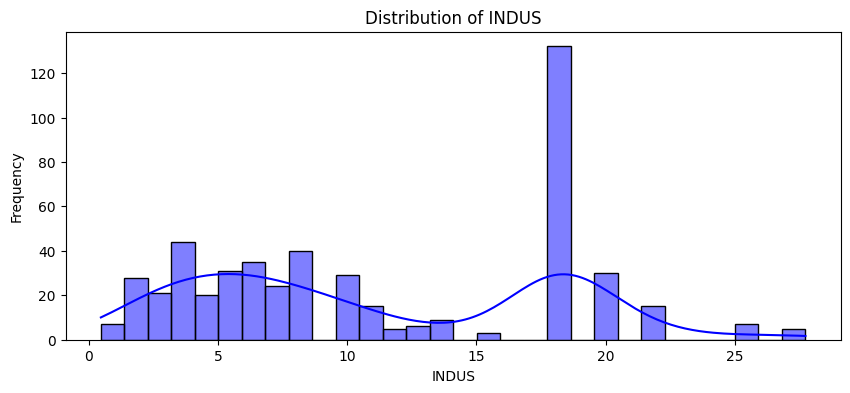

Analysis for 'INDUS':
Unique Values Count : 76
Unique Values Count : INDUS
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: count, Length: 76, dtype: int64

Mean Value : 11.14
Median Value : 9.69
Mode (Most Frequent Value) : 18.10
Variance : 47.06
Standard Deviation : 6.86
------------------------------------------------------------------------------------------




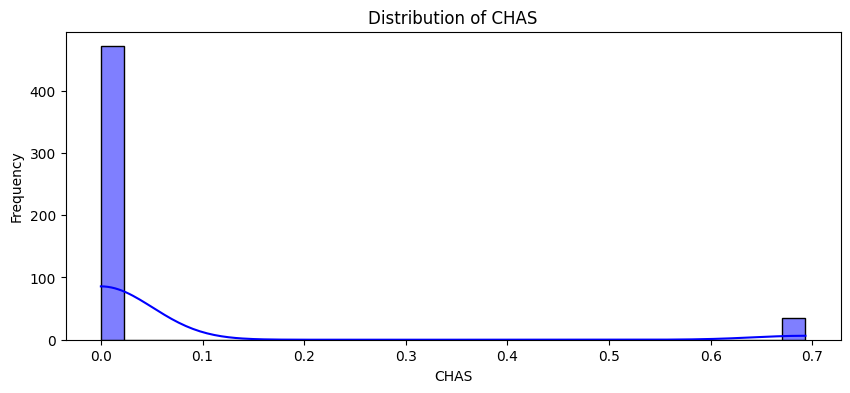

Analysis for 'CHAS':
Unique Values Count : 2
Unique Values Count : CHAS
0.000000    471
0.693147     35
Name: count, dtype: int64

Mean Value : 0.05
Median Value : 0.00
Mode (Most Frequent Value) : 0.00
Variance : 0.03
Standard Deviation : 0.18
------------------------------------------------------------------------------------------




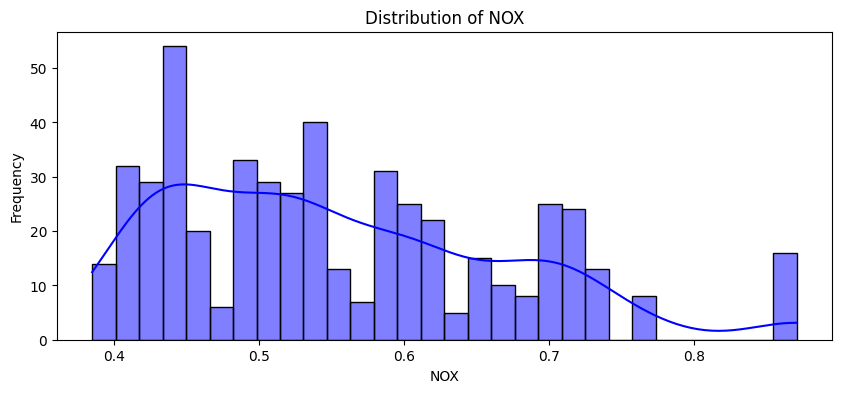

Analysis for 'NOX':
Unique Values Count : 81
Unique Values Count : NOX
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.394     1
0.518     1
0.385     1
0.389     1
0.435     1
Name: count, Length: 81, dtype: int64

Mean Value : 0.55
Median Value : 0.54
Mode (Most Frequent Value) : 0.54
Variance : 0.01
Standard Deviation : 0.12
------------------------------------------------------------------------------------------




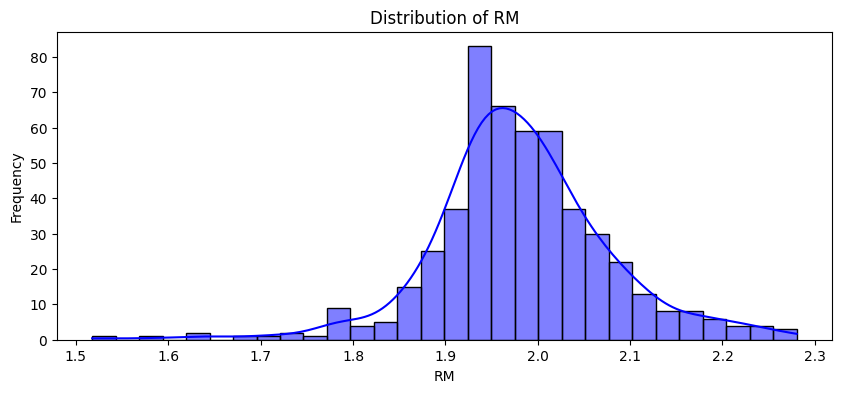

Analysis for 'RM':
Unique Values Count : 446
Unique Values Count : RM
1.904046    3
1.969487    3
1.963890    3
1.978101    3
2.002155    3
           ..
1.925562    1
2.003640    1
1.882818    1
1.928619    1
2.076437    1
Name: count, Length: 446, dtype: int64

Mean Value : 1.98
Median Value : 1.98
Mode (Most Frequent Value) : 1.90
Variance : 0.01
Standard Deviation : 0.10
------------------------------------------------------------------------------------------




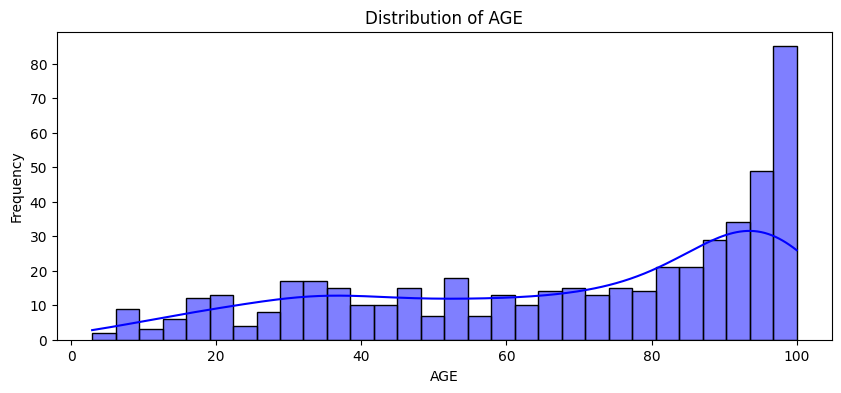

Analysis for 'AGE':
Unique Values Count : 356
Unique Values Count : AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

Mean Value : 68.57
Median Value : 77.50
Mode (Most Frequent Value) : 100.00
Variance : 792.36
Standard Deviation : 28.15
------------------------------------------------------------------------------------------




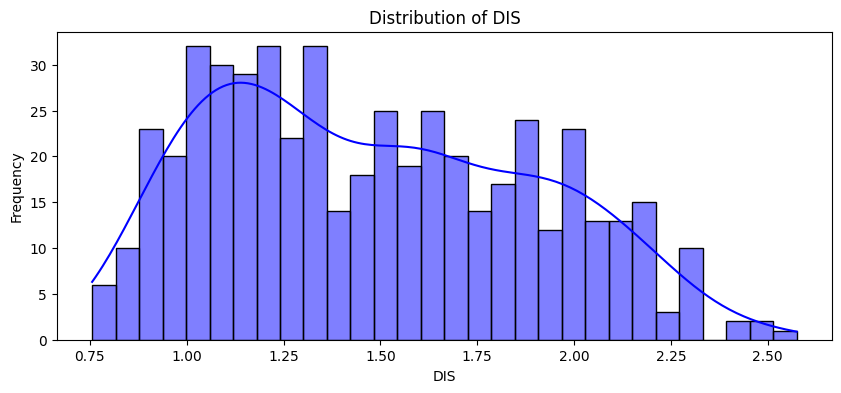

Analysis for 'DIS':
Unique Values Count : 412
Unique Values Count : DIS
1.503010    5
1.905222    4
1.838532    4
2.056007    4
1.856407    4
           ..
1.230225    1
1.151205    1
1.112088    1
1.088865    1
1.254191    1
Name: count, Length: 412, dtype: int64

Mean Value : 1.48
Median Value : 1.44
Mode (Most Frequent Value) : 1.50
Variance : 0.17
Standard Deviation : 0.41
------------------------------------------------------------------------------------------




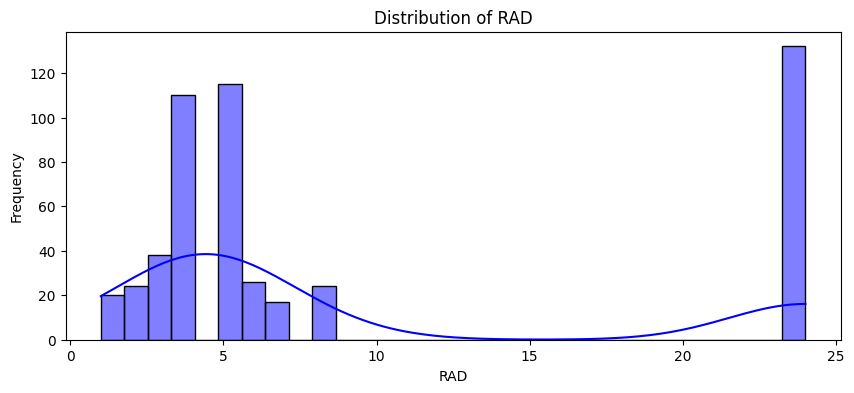

Analysis for 'RAD':
Unique Values Count : 9
Unique Values Count : RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

Mean Value : 9.55
Median Value : 5.00
Mode (Most Frequent Value) : 24.00
Variance : 75.82
Standard Deviation : 8.71
------------------------------------------------------------------------------------------




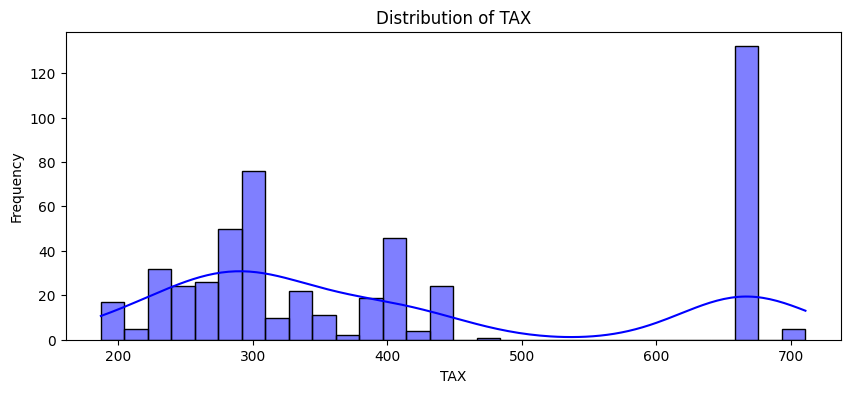

Analysis for 'TAX':
Unique Values Count : 66
Unique Values Count : TAX
666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
285.0      1
198.0      1
256.0      1
244.0      1
313.0      1
Name: count, Length: 66, dtype: int64

Mean Value : 408.24
Median Value : 330.00
Mode (Most Frequent Value) : 666.00
Variance : 28404.76
Standard Deviation : 168.54
------------------------------------------------------------------------------------------




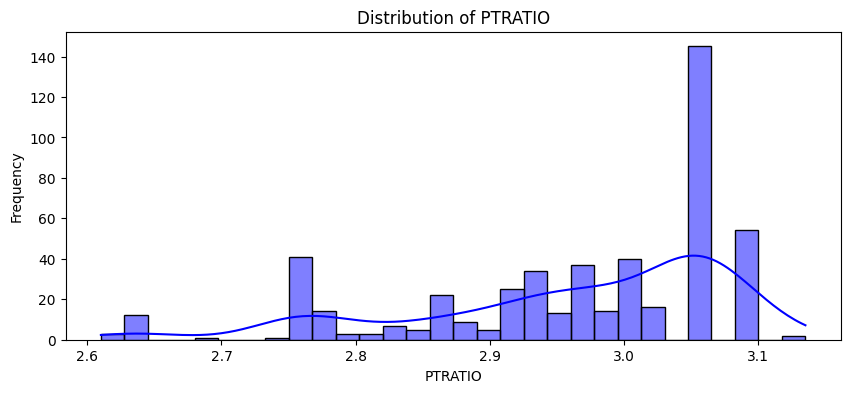

Analysis for 'PTRATIO':
Unique Values Count : 46
Unique Values Count : PTRATIO
3.054001    140
2.753661     34
3.091042     27
2.933857     23
3.005683     19
2.912351     18
2.975530     17
3.000720     17
2.965273     16
2.867899     16
3.100092     15
2.785011     13
2.639057     12
2.939162     11
3.086487     11
2.980619      9
3.025291      8
3.030134      8
2.923162      7
2.856470      6
2.884801      5
2.833213      5
3.049273      5
2.944439      5
2.839078      5
2.995732      4
2.960105      4
2.879198      4
2.954910      4
2.766319      4
2.970414      4
2.890372      4
2.990720      3
2.610070      3
2.760010      3
2.791165      3
2.827314      2
2.809403      2
2.985682      2
3.135494      2
2.681022      1
2.778819      1
2.906901      1
3.095578      1
2.734368      1
2.803360      1
Name: count, dtype: int64

Mean Value : 2.96
Median Value : 3.00
Mode (Most Frequent Value) : 3.05
Variance : 0.01
Standard Deviation : 0.12
--------------------------------------------

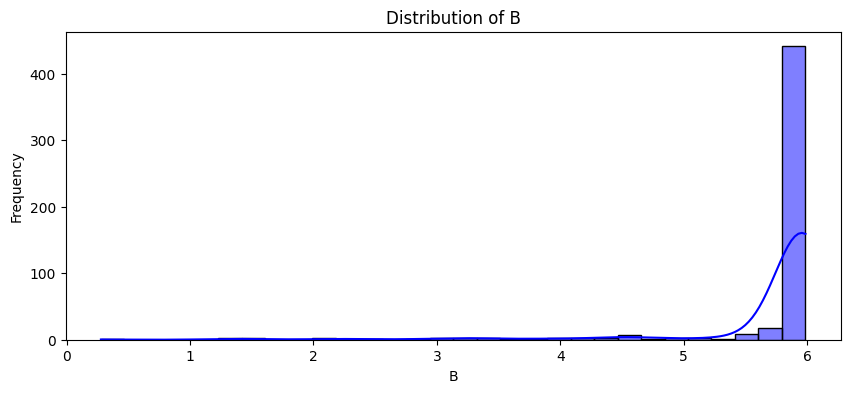

Analysis for 'B':
Unique Values Count : 357
Unique Values Count : B
5.986201    121
5.978227      3
5.982020      3
5.932616      2
5.980707      2
           ... 
5.485461      1
5.967710      1
5.928072      1
5.828710      1
5.973784      1
Name: count, Length: 357, dtype: int64

Mean Value : 5.76
Median Value : 5.97
Mode (Most Frequent Value) : 5.99
Variance : 0.53
Standard Deviation : 0.73
------------------------------------------------------------------------------------------




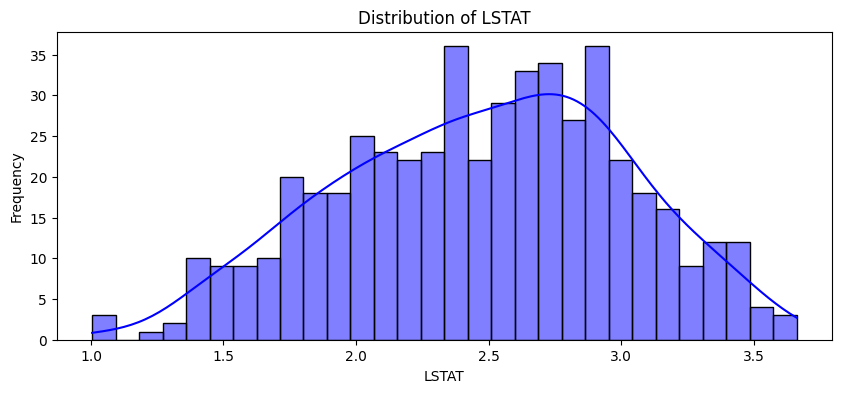

Analysis for 'LSTAT':
Unique Values Count : 455
Unique Values Count : LSTAT
2.173615    3
2.714695    3
1.996060    3
2.951258    3
2.202765    3
           ..
1.463255    1
1.071584    1
1.004302    1
2.005526    1
2.183802    1
Name: count, Length: 455, dtype: int64

Mean Value : 2.48
Median Value : 2.51
Mode (Most Frequent Value) : 2.00
Variance : 0.29
Standard Deviation : 0.54
------------------------------------------------------------------------------------------




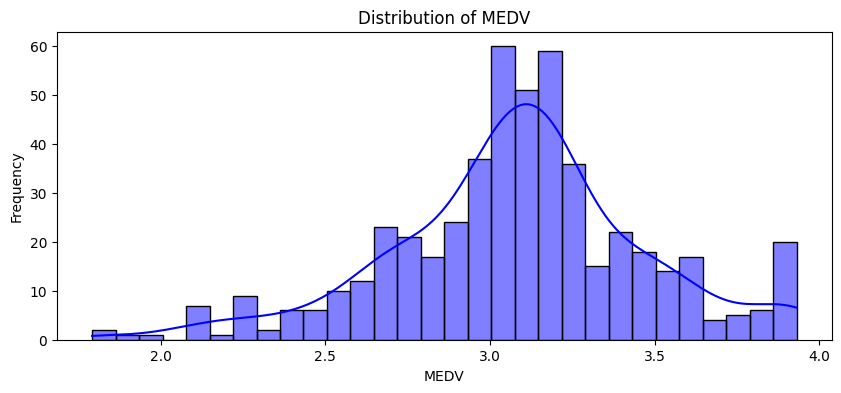

Analysis for 'MEDV':
Unique Values Count : 229
Unique Values Count : MEDV
3.931826    16
3.258097     8
3.135494     7
3.122365     7
3.182212     7
            ..
3.523415     1
3.572346     1
3.443618     1
3.535145     1
2.208274     1
Name: count, Length: 229, dtype: int64

Mean Value : 3.09
Median Value : 3.10
Mode (Most Frequent Value) : 3.93
Variance : 0.15
Standard Deviation : 0.39
------------------------------------------------------------------------------------------




In [10]:
numerical_features = Data.select_dtypes(include=['float', 'int'])
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(Data[feature], kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


    # Print mode and other statistics for the feature
    print(f"Analysis for '{feature}':")
    print(f"Unique Values Count : {numerical_features[feature].nunique()}")
    print(f"Unique Values Count : {numerical_features[feature].value_counts()}\n")
    print(f"Mean Value : {numerical_features[feature].mean():.2f}")
    print(f"Median Value : {numerical_features[feature].median():.2f}")
    print(f"Mode (Most Frequent Value) : {numerical_features[feature].mode()[0]:.2f}")
    print(f"Variance : {numerical_features[feature].var():.2f}")
    print(f"Standard Deviation : {numerical_features[feature].std():.2f}")    
    print("-" * 90)
    print("\n")

In [11]:
# Unique Values and Distribution
# '- Unique Values Count: 229
# - 'MEDV' column has 229 unique values, indicating a relatively large range of values.
# - The value counts show that the most frequent value is 50.0, which appears 16 times.

# Central Tendency
# - Mean Value: 22.53
# - The mean value of the 'MEDV' column is 22.53, which suggests that the average median house price is around $22,500.
# - Median Value: 21.20
# - The median value of the 'MEDV' column is 21.20, which is slightly lower than the mean value.
# - Mode (Most Frequent Value): 50.0
# - The most frequent value in the 'MEDV' column is 50.0, which appears to be an outlier given the mean and median values.

# Variability
# - Variance: 84.59
# - The variance of the 'MEDV' column is 84.59, indicating a relatively large spread of values.
# - Standard Deviation: 9.20
# - The standard deviation of the 'MEDV' column is 9.20, which suggests that the values are spread out over a range of around $9,000.

# Overall, the 'MEDV' column appears to have a skewed distribution with a large range of values. The mode is an outlier, and the mean 
# and median values suggest that the average median house price is around $21,000-$22,500.

In [12]:
Data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

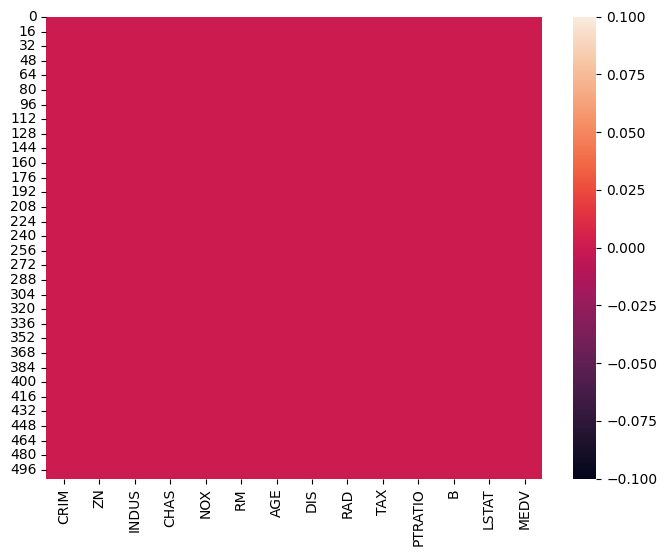

In [13]:
# show the null values using the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Data.isnull())
plt.show()

In [14]:
# Define features (drop target column)
X = Data.drop(columns=['MEDV'])
y = Data['MEDV']

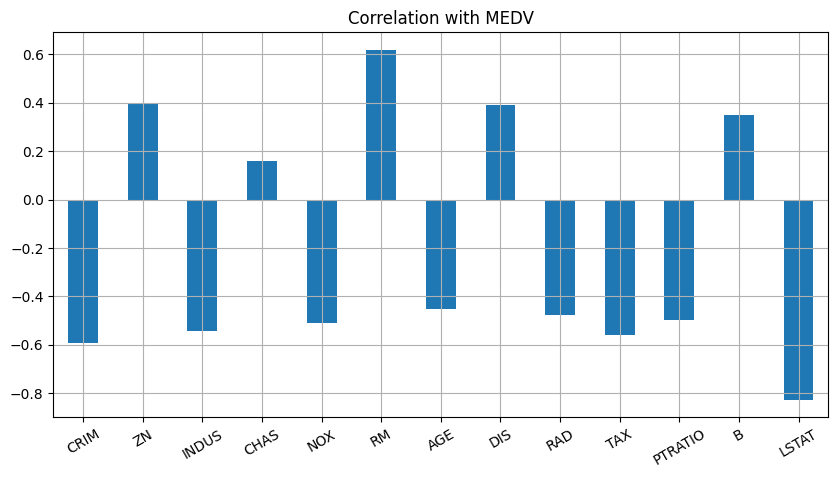

In [15]:
X.corrwith(y).plot.bar ( figsize=(10,5), title = 'Correlation with MEDV', rot = 30, grid = True )
plt.show()

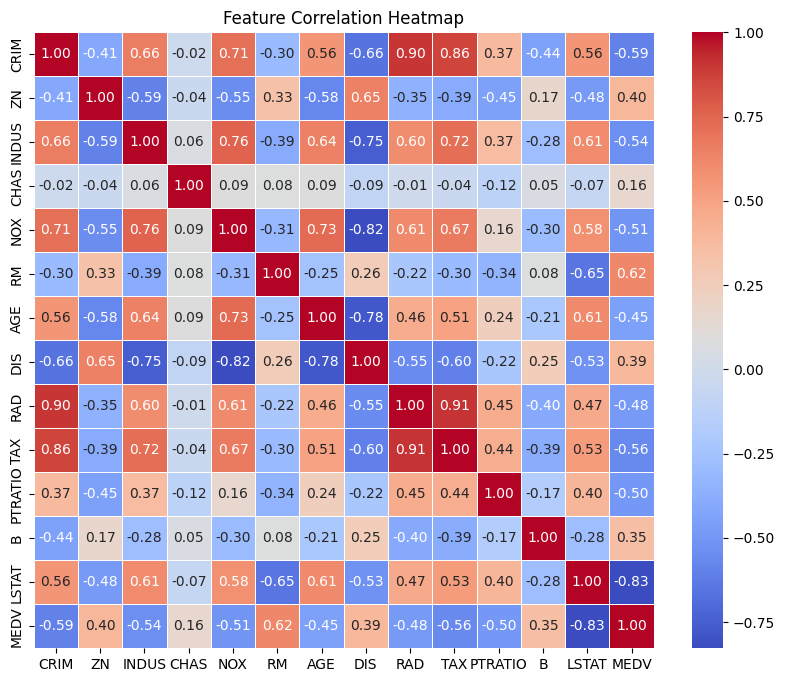

In [16]:
# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
#        Feature        VIF
# 0    Feature_1   7.903580
# 1    Feature_2   2.437771
# 2    Feature_3   3.918109
# 3    Feature_4   1.100729
# 4    Feature_5   4.789756
# 5    Feature_6   2.152092
# 6    Feature_7   3.205854
# 7    Feature_8   5.162654
# 8    Feature_9  11.093999
# 9   Feature_10   8.360882
# 10  Feature_11   2.038805
# 11  Feature_12   1.276549
# 12  Feature_13   3.182471

In [18]:
# correlation heatmap of highly correlated features with 'MEDV'
high_corr = Data.corr()

In [19]:
high_corr_features = high_corr.index[abs(high_corr['MEDV']) >= 0.4]

In [20]:
print(len(high_corr_features))
print(high_corr_features)

11
Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT', 'MEDV'],
      dtype='object')


In [21]:
# remaining_columns = Data.columns.difference(high_corr_features)
#                         or
remaining_columns = list(set(Data.columns) - set(high_corr_features))
print(len(remaining_columns))
print(remaining_columns)

3
['DIS', 'B', 'CHAS']


In [22]:
len(Data.columns)

14

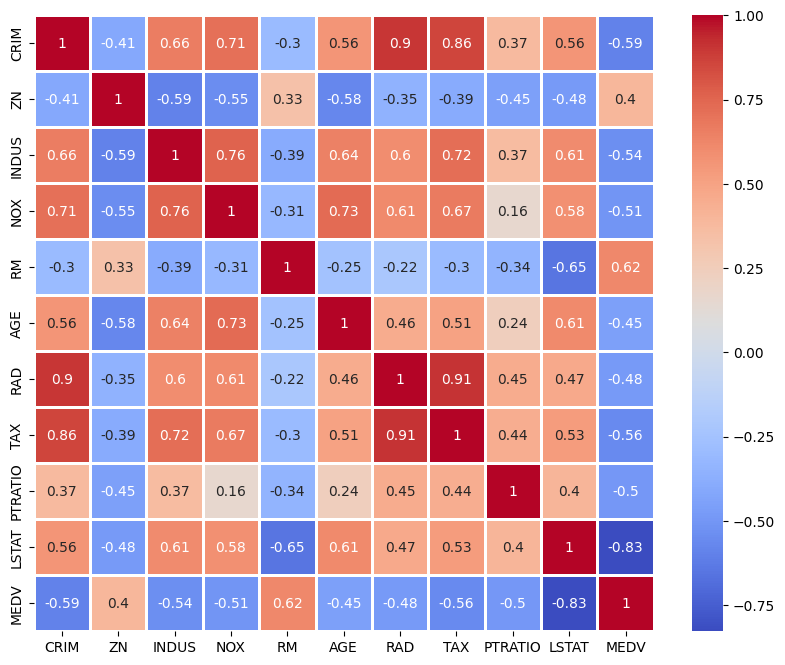

In [23]:
# correlation heatmap of highly correlated features with 'SalePrice'
plt.figure(figsize=(10,8))
ax = sns.heatmap(Data[high_corr_features].corr(), cmap='coolwarm', annot=True, linewidths=2)

In [24]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [26]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [29]:
# Convert 'y' to NumPy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [30]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [31]:
# Reshape the arrays
X_train = X_train.reshape(404, 13, 1)
X_test = X_test.reshape(102, 13, 1)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13, 1)
(102, 13, 1)
(404,)
(102,)


In [33]:
# Define the Neural Network Model
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) ])  # Single neuron for regression output

In [34]:
# Compile the model
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [35]:
# Train the model
History_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 8.1814 - mae: 2.8054 - val_loss: 5.3385 - val_mae: 2.2361
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4869 - mae: 1.9832 - val_loss: 2.5863 - val_mae: 1.5113
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1436 - mae: 1.3392 - val_loss: 0.9763 - val_mae: 0.8902
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9228 - mae: 0.8305 - val_loss: 0.4455 - val_mae: 0.5430
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5399 - mae: 0.5942 - val_loss: 0.3547 - val_mae: 0.4915
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4491 - mae: 0.5494 - val_loss: 0.2835 - val_mae: 0.4342
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3023 - mae: 0.4407 - val_loss: 0.2462 - val_mae: 0.4056
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3021 - mae: 0.4386 - val_loss: 0.2253 - val_mae: 0.3911
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2

In [36]:
# Evaluate on test data
test_loss, test_mae = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0369 - mae: 0.1502
Test Loss: 0.04535236954689026, Test MAE: 0.16177502274513245


In [37]:
# Make predictions
y_pred_1 = model_1.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [38]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred_1)
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better model

R² Score: 0.6730


In [39]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [40]:
from tensorflow.keras.layers import LeakyReLU

model_2 = Sequential ([
    Dense(128, activation=None, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dense(64, activation=None),
    LeakyReLU(alpha=0.1),
    Dense(1)  ])

In [41]:
optimizer = Adam(learning_rate=0.0005)  # Default 0.001 se thoda kam

In [42]:
# Compile the model
model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [43]:
# Train the model with early stopping
History_2 = model_2.fit (
    X_train, y_train,
    epochs=200, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping] )

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 9.8666 - mae: 3.0376 - val_loss: 4.7319 - val_mae: 2.0345
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8904 - mae: 1.8017 - val_loss: 1.4279 - val_mae: 1.0729
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1306 - mae: 0.9258 - val_loss: 0.3619 - val_mae: 0.4822
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5357 - mae: 0.5851 - val_loss: 0.2639 - val_mae: 0.4151
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2752 - mae: 0.4276 - val_loss: 0.2771 - val_mae: 0.4315
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2704 - mae: 0.4177 - val_loss: 0.2542 - val_mae: 0.4195
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2040 - mae: 0.3654 - val_loss: 0.2204 - val_mae: 0.3965
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1882 - mae: 0.3509 - val_loss: 0.2014 - val_mae: 0.3804
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1

In [44]:
# Evaluate the model after training
test_loss, test_mae = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0253 - mae: 0.1208
Test Loss: 0.030874714255332947, Test MAE: 0.12835972011089325


In [45]:
# Make predictions
y_pred_2 = model_2.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [46]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred_2)
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better model

R² Score: 0.7774


In [47]:
# Display some predictions
for i in range(5):
    print(f'Predicted: {y_pred_2[i][0]:.4f}, Actual: {y_test[i]:.4f}')

Predicted: 3.4143, Actual: 3.2027
Predicted: 3.6160, Actual: 3.5086
Predicted: 2.7925, Actual: 2.6810
Predicted: 3.3845, Actual: 3.1697
Predicted: 2.8883, Actual: 2.8391


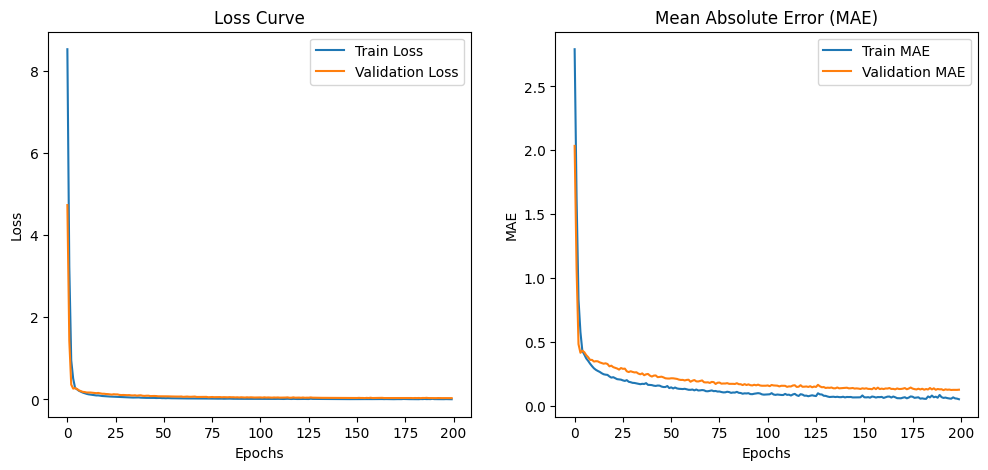

In [48]:
# Ye graph batayega ki model ka loss aur error kaise kam ho raha hai training ke dauraan.
# Ye graph check karega ki model overfitting toh nahi kar raha!

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(History_2.history['loss'], label='Train Loss')
plt.plot(History_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot MAE Curve
plt.subplot(1, 2, 2)
plt.plot(History_2.history['mae'], label='Train MAE')
plt.plot(History_2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()

plt.show()

# Post-Model Assumption Checks -

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


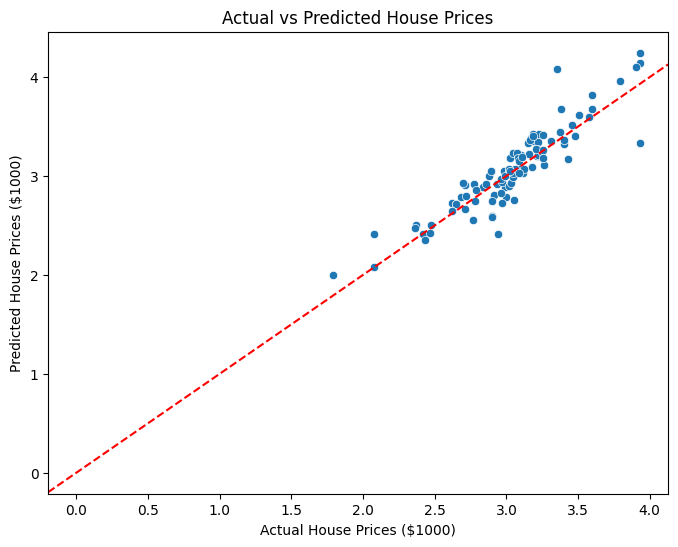

In [49]:
# Ye scatter plot dikhayega actual vs predicted values. Ideally, sabhi points ek straight line ke aas paas hone chahiye.
# Agar points red dashed line ke paas hain, toh model acha predict kar raha hai!

# Make Predictions on Test Data
y_pred_2 = model_2.predict(X_test)

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_2.flatten())
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices ($1000)")
plt.title("Actual vs Predicted House Prices")
plt.axline([0, 0], slope=1, color='r', linestyle='dashed')  # Perfect Prediction Line
plt.show()

### Residual Normality Check (Histogram & Q-Q Plot)

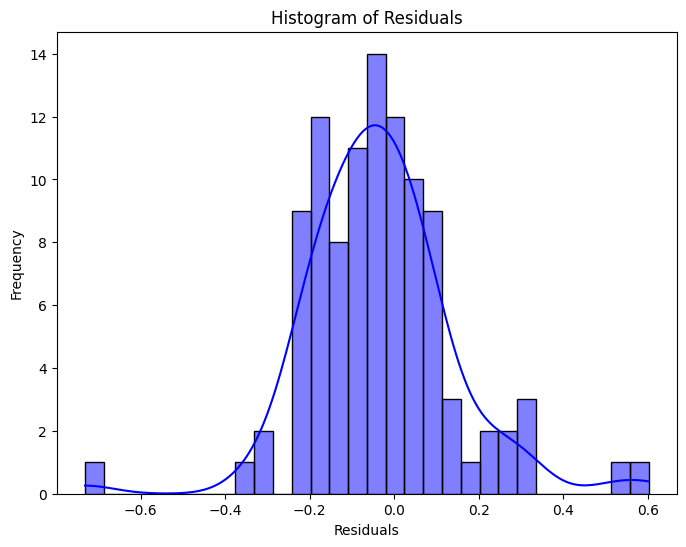

In [50]:
#  Agar residuals bell-shaped curve follow kar rahe hain, toh errors normal hain.

# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_2.flatten()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

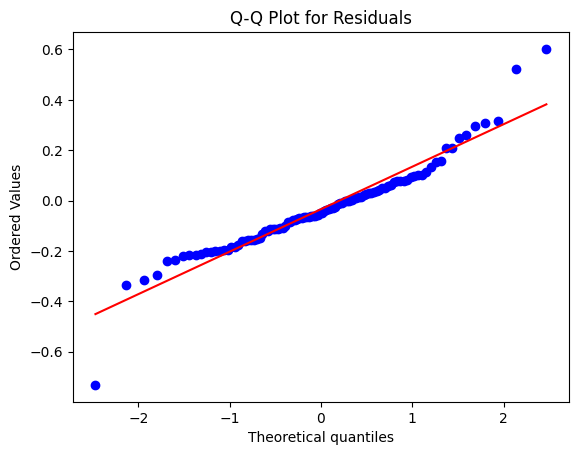

In [51]:
# Q-Q (Quantile-Quantile) Plot

# Agar points ek straight line ke close hain, toh residuals normal hain.
# Agar tails me deviation hai, toh kuch outliers ya skewness ho sakti hai.

import scipy.stats as stats

# Q-Q Plot for Residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.show()

### Homoscedasticity Check (White Hat Test)

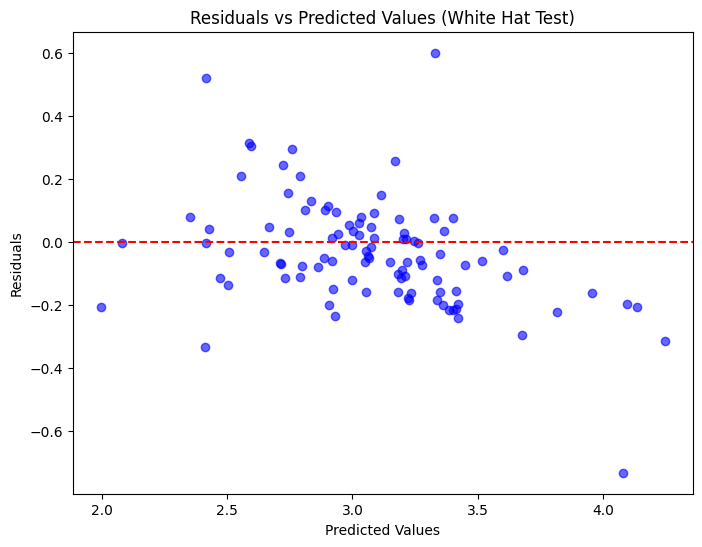

In [52]:
# Agar points randomly spread hain aur ek pattern follow nahi kar rahe, toh errors homoscedastic hain.
# Agar cone shape ya curve dikh raha hai, toh model me heteroscedasticity hai (variance issue).

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_2, residuals, alpha=0.6, color="blue")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (White Hat Test)")
plt.show()

### Durbin-Watson Test (Autocorrelation in Residuals)

In [53]:
# DW value ~ 2 ke kareeb honi chahiye (1.5 - 2.5 is good).
# Agar 1 se kam hai, toh positive autocorrelation hai (errors related hain).
# Agar 3 se zyada hai, toh negative autocorrelation ho sakti hai.

from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic : {dw_stat}")

Durbin-Watson Statistic : 1.8318144823166351


### Shapiro-Wilk Test (Normality Check)

In [54]:
# Agar p-value > 0.05 hai, toh residuals normal hain.
# Agar p-value < 0.05, toh errors normal nahi hain (outliers ya skewness ho sakti hai).

from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value : {p_value}")

if p_value > 0.05:
    print("Residuals are normally distributed (Fail to reject H0)")
else:
    print("Residuals are NOT normally distributed (Reject H0)")

Shapiro-Wilk Test p-value : 6.134644299538424e-05
Residuals are NOT normally distributed (Reject H0)


## Conclusion :
####  ✔ Histogram & Q-Q Plot → Residual normality check.
#### ✔ White Hat Test → Homoscedasticity check (variance constant hai ya nahi).
#### ✔ Durbin-Watson Test → Errors correlated toh nahi hain.
#### ✔ Shapiro-Wilk Test → Statistical normality check.

## Agar koi violation dikhe, toh:
#### 1️⃣ Feature Engineering (Transform variables, log/square root transformation).
#### 2️⃣ Try different models (Random Forest, XGBoost, etc.).
#### 3️⃣ Remove outliers (Z-score, IQR method).

## ACF & PACF Plots Code

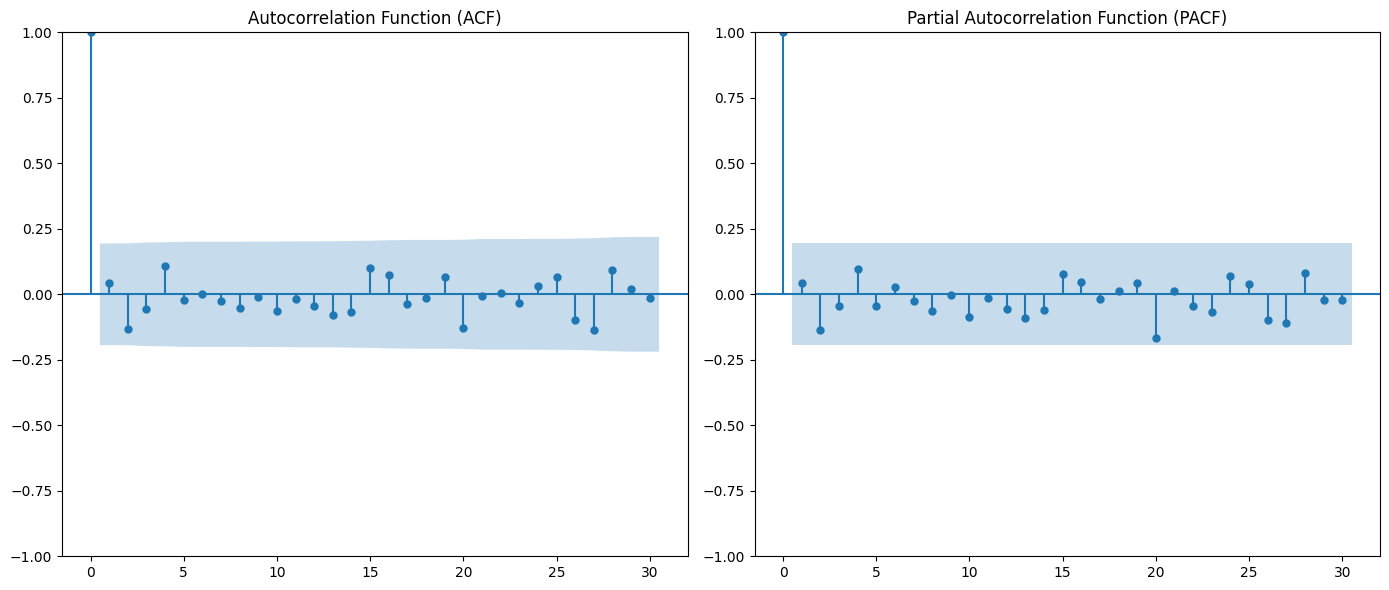

In [55]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate residuals
residuals = y_test - y_pred_2.flatten()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot ACF (Autocorrelation Function)
plot_acf(residuals, lags=30, alpha=0.05, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# Plot PACF (Partial Autocorrelation Function)
plot_pacf(residuals, lags=30, alpha=0.05, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

# Show plots
plt.tight_layout()  # Adjust layout
plt.show()

#### Agar ACF me sirf first 1-2 lags significant hain, aur baaki spikes zero ke kareeb hain, toh residuals white noise hain → ✅ Model sahi hai!
#### Agar ACF me multiple significant spikes hain, toh iska matlab autocorrelation issue hai → ❌ Feature Engineering ya model tuning zaroori hai!
#### PACF me agar ek spike ke baad sab zero hain, toh yeh AR (AutoRegressive) behavior suggest karta hai.
#### 📌 Agar spikes zero line ke bahar nikal rahe hain, toh autocorrelation issue ho sakta hai.
#### 📌 Agar koi specific lags significant hain, toh time-dependent pattern ho sakta hai.

# 1. Ljung-Box Test for White Noise

In [56]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Calculate residuals
residuals = y_test - y_pred_2.flatten()

# Perform Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  4.632794   0.914321


### p-value > 0.05 → ✅ Residuals white noise hain (Good Model, No pattern).
### p-value < 0.05 → ❌ Residuals me autocorrelation hai (Model me kuch missing hai).
### 🔹 Agar p-value > 0.05 hai, toh iska matlab residuals random hain aur model sahi fit ho raha hai.
### 🔹 Agar p-value < 0.05 hai, toh iska matlab residuals me koi pattern hai, jo feature engineering ya model tuning se fix ho sakta hai.

# 2. Visual Check for White Noise (Random Pattern)

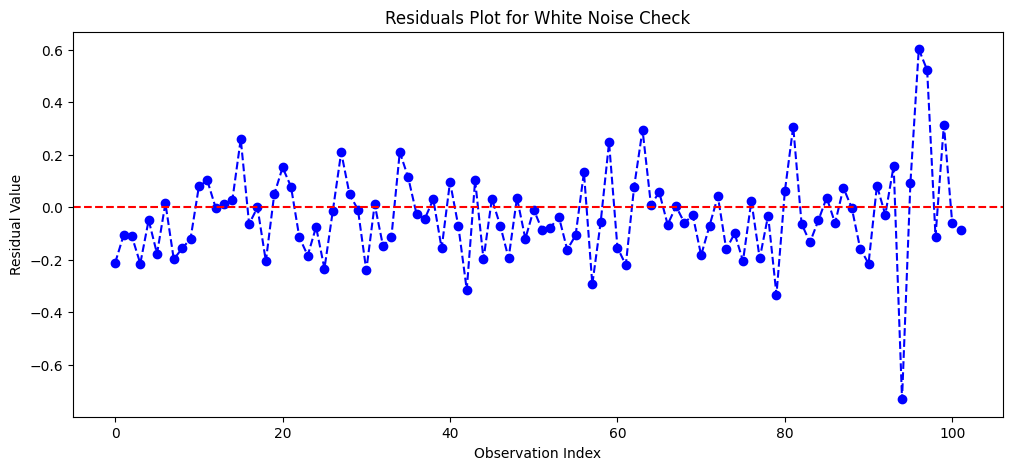

In [57]:
plt.figure(figsize=(12, 5))
plt.plot(residuals, marker='o', linestyle='dashed', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Plot for White Noise Check")
plt.xlabel("Observation Index")
plt.ylabel("Residual Value")
plt.show()

#### 📌 Agar ye plot randomly scattered hai bina kisi pattern ke, toh residuals white noise hain! 🚀

## Multicollinearity Check Methods :-
### 1. Variance Inflation Factor (VIF)
### 2. Correlation Matrix (Heatmap)

In [58]:
# 1️⃣ Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert X_train to DataFrame for VIF calculation
X_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1), columns=[f'Feature_{i+1}' for i in range(X_train.shape[1])])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# Print VIF values
print(vif_data)

       Feature        VIF
0    Feature_1   7.903580
1    Feature_2   2.437771
2    Feature_3   3.918109
3    Feature_4   1.100729
4    Feature_5   4.789756
5    Feature_6   2.152092
6    Feature_7   3.205854
7    Feature_8   5.162654
8    Feature_9  11.093999
9   Feature_10   8.360882
10  Feature_11   2.038805
11  Feature_12   1.276549
12  Feature_13   3.182471


#### VIF > 5 → ❌ High multicollinearity (Feature remove ya transform karna better hoga)
#### VIF < 5 → ✅ Acceptable multicollinearity
#### VIF ≈ 1 → ✅ No multicollinearity (Best Case)

### Remove one of the correlated features (jo zyada correlated hai)
### Use Principal Component Analysis (PCA) to reduce dimensionality
### Apply Ridge or Lasso Regression (ye regularization methods multicollinearity handle kar sakti hain)

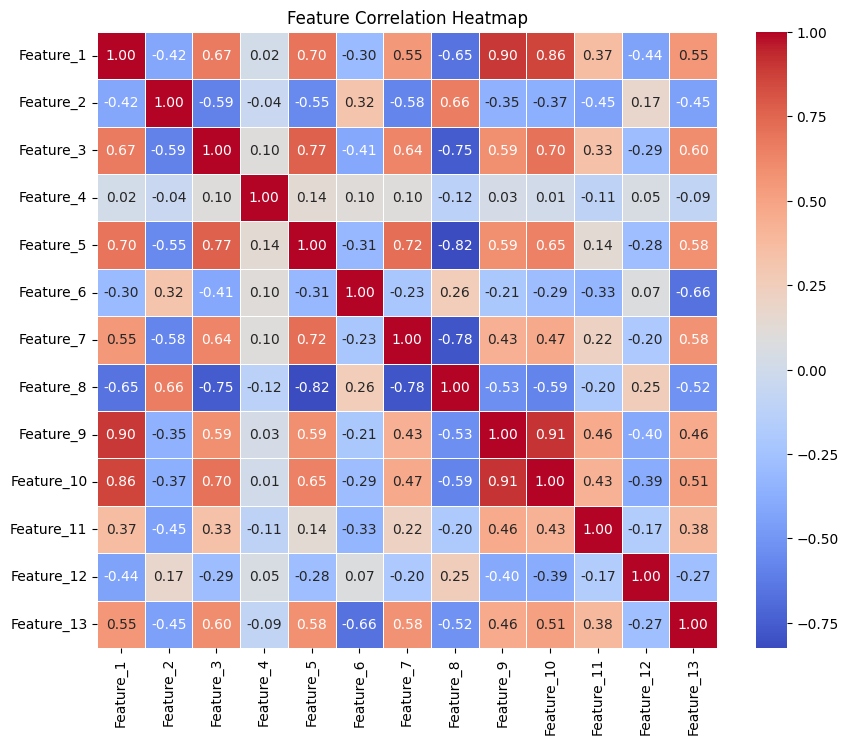

In [59]:
# 2️⃣ Correlation Matrix (Heatmap)

# Correlation Matrix
correlation_matrix = X_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Dark Red (close to +1) → Strong positive correlation → Multicollinearity Issue
#### Dark Blue (close to -1) → Strong negative correlation → May cause instability
#### Near 0 → ✅ No significant correlation (Best Case)

In [60]:
# # 1️⃣ Remove Highly Correlated Features:
# X_df_drop = X_df.drop(columns=['Feature_9', 'Feature_10'])  # Removing high VIF features


# #2️⃣ Apply PCA (Principal Component Analysis):
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)  # Reduce dimensions
# X_pca = pca.fit_transform(X_df)


# # 3️⃣ Use Ridge Regression (L2 Regularization):
# from sklearn.linear_model import Ridge
# model_Ridge = Ridge(alpha=1.0)  # Regularization to handle multicollinearity
# model_Ridge.fit(X_train, y_train)

# Multicollinearity Check Before Train-Test Split

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


In [62]:
# Standardize Features (Optional but Recommended for VIF Calculation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
print(X_scaled.shape)

(506, 13)


In [64]:
X_scaled

array([[-0.78995997,  1.22932964, -1.2879095 , ..., -1.44553546,
         0.31108607, -1.2761181 ],
       [-0.7697552 , -0.58909073, -0.59338101, ..., -0.23432428,
         0.31108607, -0.29549095],
       [-0.76977425, -0.58909073, -0.59338101, ..., -0.23432428,
         0.29697693, -1.59738213],
       ...,
       [-0.73839446, -0.58909073,  0.11573841, ...,  1.09991488,
         0.31108607, -1.081705  ],
       [-0.69434626, -0.58909073,  0.11573841, ...,  1.09991488,
         0.29913562, -0.86049628],
       [-0.7507904 , -0.58909073,  0.11573841, ...,  1.09991488,
         0.31108607, -0.54189116]])

In [65]:
# Convert to DataFrame after Scaling
# X_df = pd.DataFrame(X_scaled, columns=X.columns)
#          or
X_data_frame = pd.DataFrame(X_scaled)

In [66]:
X_data_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.789960,1.229330,-1.287909,-0.272599,-0.144217,0.453447,-0.120013,0.357474,-0.982843,-0.666608,-1.445535,0.311086,-1.276118
1,-0.769755,-0.589091,-0.593381,-0.272599,-0.740262,0.240390,0.367166,0.742438,-0.867883,-0.987329,-0.234324,0.311086,-0.295491
2,-0.769774,-0.589091,-0.593381,-0.272599,-0.740262,1.256834,-0.265812,0.742438,-0.867883,-0.987329,-0.234324,0.296977,-1.597382
3,-0.764946,-0.589091,-1.306878,-0.272599,-0.835284,1.017096,-0.809889,1.150436,-0.752922,-1.106115,0.162604,0.303235,-2.050937
4,-0.730775,-0.589091,-1.306878,-0.272599,-0.835284,1.208564,-0.511180,1.150436,-0.752922,-1.106115,0.162604,0.311086,-1.170492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.736671,-0.589091,0.115738,-0.272599,0.158124,0.478066,0.018673,-0.564233,-0.982843,-0.803212,1.099915,0.294047,-0.200880
502,-0.752792,-0.589091,0.115738,-0.272599,0.158124,-0.189116,0.288933,-0.701049,-0.982843,-0.803212,1.099915,0.311086,-0.306512
503,-0.738394,-0.589091,0.115738,-0.272599,0.158124,0.988524,0.797449,-0.791089,-0.982843,-0.803212,1.099915,0.311086,-1.081705
504,-0.694346,-0.589091,0.115738,-0.272599,0.158124,0.749086,0.736996,-0.627491,-0.982843,-0.803212,1.099915,0.299136,-0.860496


In [67]:
# VIF Calculation using for loop and if-else
vif_data = []
for i in range(X_data_frame.shape[1]):
    vif_value = variance_inflation_factor(X_data_frame.values, i)
    feature_name = X_data_frame.columns[i]
    
    if vif_value > 5:
        print(f"⚠ Feature '{feature_name}' has HIGH multicollinearity (VIF = {vif_value:.2f})")
    else:
        print(f"✅ Feature '{feature_name}' is fine (VIF = {vif_value:.2f})")
    
    vif_data.append({"Feature": feature_name, "VIF": vif_value})

⚠ Feature '0' has HIGH multicollinearity (VIF = 8.12)
✅ Feature '1' is fine (VIF = 2.35)
✅ Feature '2' is fine (VIF = 4.03)
✅ Feature '3' is fine (VIF = 1.08)
✅ Feature '4' is fine (VIF = 4.73)
✅ Feature '5' is fine (VIF = 2.02)
✅ Feature '6' is fine (VIF = 3.31)
⚠ Feature '7' has HIGH multicollinearity (VIF = 5.08)
⚠ Feature '8' has HIGH multicollinearity (VIF = 11.20)
⚠ Feature '9' has HIGH multicollinearity (VIF = 8.59)
✅ Feature '10' is fine (VIF = 1.97)
✅ Feature '11' is fine (VIF = 1.28)
✅ Feature '12' is fine (VIF = 3.23)


In [68]:
# Convert to DataFrame
vif_data_frame = pd.DataFrame(vif_data)

In [69]:
# Print Final VIF Table
print("\n   Final VIF Values \n\n", vif_data_frame)


   Final VIF Values 

     Feature        VIF
0         0   8.122380
1         1   2.351130
2         2   4.033196
3         3   1.078113
4         4   4.734280
5         5   2.022710
6         6   3.314734
7         7   5.077598
8         8  11.197153
9         9   8.587016
10       10   1.965699
11       11   1.280031
12       12   3.228374


## Step 2: Applying PCA

In [70]:
from sklearn.decomposition import PCA

In [71]:
# Apply PCA (Choosing all components first)
pca = PCA(n_components=X_data_frame.shape[1])  # Start with all features
X_pca = pca.fit_transform(X_data_frame)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [72]:
print(explained_variance)

[0.50547358 0.60969296 0.71036726 0.77666764 0.83737339 0.8931323
 0.92356591 0.94648072 0.96337261 0.97655125 0.98773841 0.99595531
 1.        ]


## Step 3: Find Optimal Number of Components

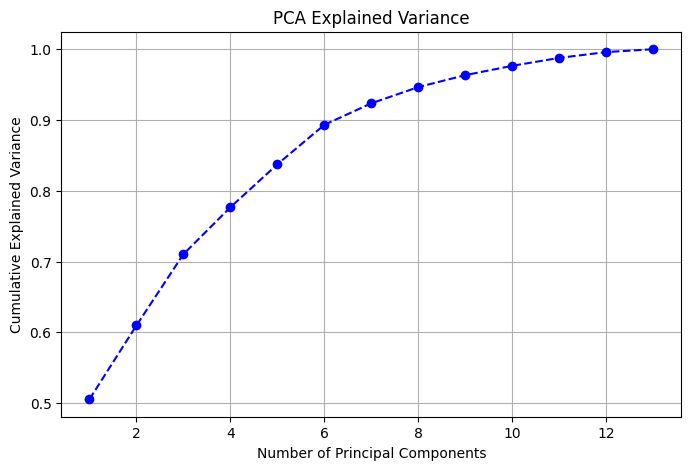

In [73]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

#### Find the point where the graph levels off (elbow point) (usually ~95% variance is enough).
#### Choose n_components accordingly.

## Step 4: Transform Data with Optimal Components

In [74]:
# Select components explaining 99% variance
# optimal_components = PCA(n_components=12)  # Try 11 or 12 based on your preference
#                         or
optimal_components = np.argmax(explained_variance >= 0.99) + 1  # First index where variance ≥ 95%

# Apply PCA with optimal components
pca = PCA(n_components=optimal_components)
X_pca_optimal = pca.fit_transform(X_data_frame)

print(f"Optimal Number of PCA Components: {optimal_components}")

Optimal Number of PCA Components: 12


## Step 5: Train-Test Split

In [75]:
# Splitting PCA Transformed Data
X_train, X_test, y_train, y_test = train_test_split(X_pca_optimal, y, test_size=0.2, random_state=42)

print(f"New Shape after PCA - Train: {X_train.shape}, Test: {X_test.shape}")

New Shape after PCA - Train: (404, 12), Test: (102, 12)


## Step 6: Train Neural Network on PCA Data

In [76]:
# Define Neural Network Model
model_pca = Sequential([
    Dense(64, activation=None, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dense(32, activation=None),
    LeakyReLU(alpha=0.1),
    Dense(1)
])

# Compile the Model
model_pca.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Train the Model
History_pca = model_pca.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 6.4774 - mae: 2.4890 - val_loss: 4.9133 - val_mae: 2.1672
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3959 - mae: 2.0109 - val_loss: 3.4018 - val_mae: 1.7653
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0704 - mae: 1.6119 - val_loss: 2.2327 - val_mae: 1.3684
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1027 - mae: 1.2596 - val_loss: 1.4223 - val_mae: 1.0355
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3028 - mae: 0.9543 - val_loss: 0.9251 - val_mae: 0.8064
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8800 - mae: 0.7819 - val_loss: 0.6272 - val_mae: 0.6478
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6565 - mae: 0.6725 - val_loss: 0.4509 - val_mae: 0.5398
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5428 - mae: 0.6144 - val_loss: 0.3431 - val_mae: 0.4687
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0

In [77]:
# Evaluate on Test Data
test_loss, test_mae = model_pca.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0468 - mae: 0.1725
Test Loss: 0.05857821926474571, Test MAE: 0.18740494549274445


In [78]:
# Make predictions
y_pred_3 = model_pca.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [79]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred_3)
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better model

R² Score: 0.5777


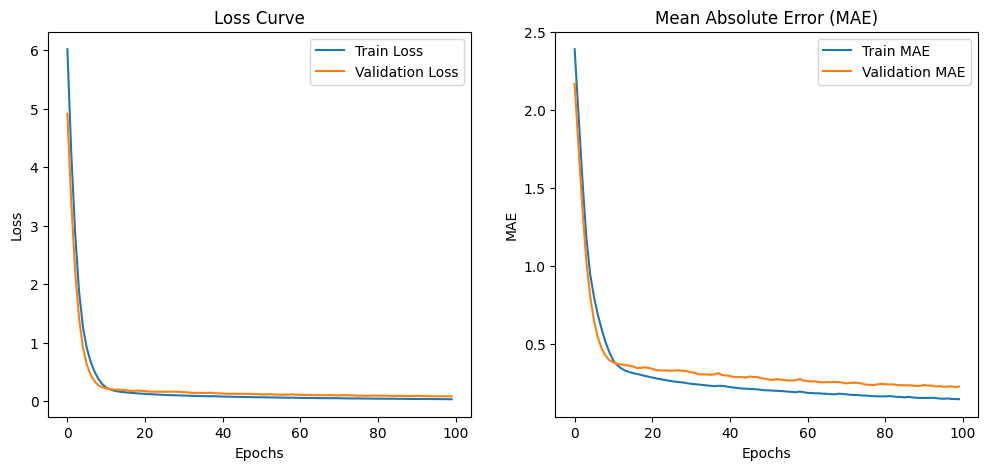

In [80]:
# Ye graph batayega ki model ka loss aur error kaise kam ho raha hai training ke dauraan.
# Ye graph check karega ki model overfitting toh nahi kar raha!

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(History_pca.history['loss'], label='Train Loss')
plt.plot(History_pca.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot MAE Curve
plt.subplot(1, 2, 2)
plt.plot(History_pca.history['mae'], label='Train MAE')
plt.plot(History_pca.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()

plt.show()

In [81]:
# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_3.flatten()

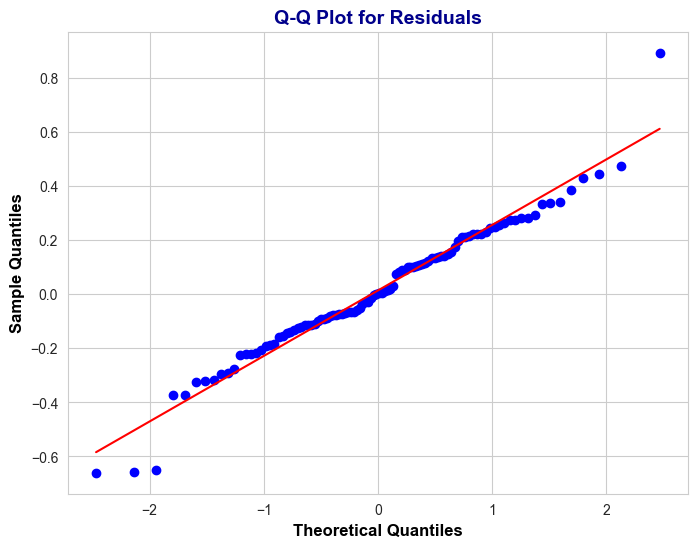

In [82]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create the Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)

# Enhance aesthetics
plt.title("Q-Q Plot for Residuals", fontsize=14, fontweight='bold', color="darkblue")
plt.xlabel("Theoretical Quantiles", fontsize=12, fontweight='bold', color="black")
plt.ylabel("Sample Quantiles", fontsize=12, fontweight='bold', color="black")

# Show the plot
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


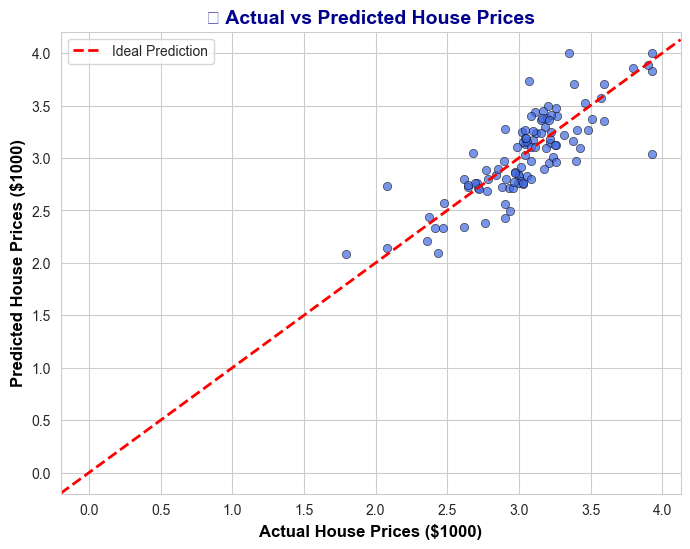

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make Predictions on Test Data
y_pred_3 = model_pca.predict(X_test).flatten()  # Ensure it's 1D

# Set Seaborn Style
sns.set_style("whitegrid")

# Create Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_3, color="royalblue", edgecolor="black", alpha=0.7)

# Perfect Prediction Line
plt.axline([0, 0], slope=1, color='red', linestyle='dashed', linewidth=2, label="Ideal Prediction")

# Labels & Title with Styling
plt.xlabel("Actual House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Predicted House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Actual vs Predicted House Prices", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

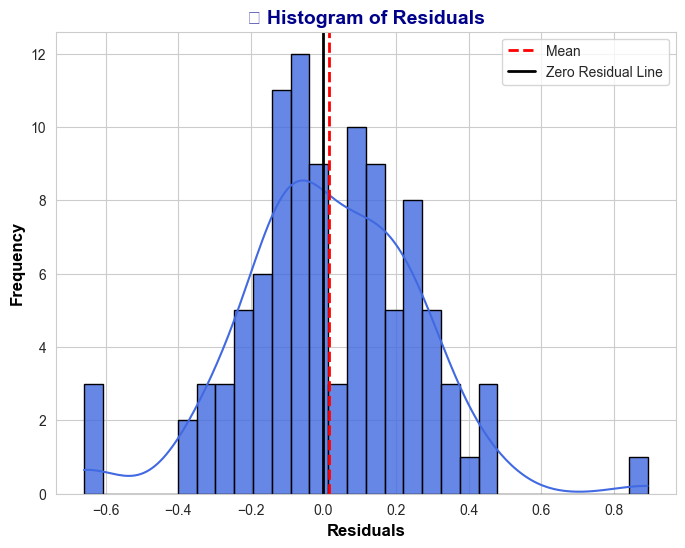

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_3.flatten()

# Set Seaborn Style
sns.set_style("whitegrid")

# Create Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.8)

# Add Mean & Zero Line
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(0, color='black', linestyle='solid', linewidth=2, label="Zero Residual Line")

# Labels & Title with Styling
plt.xlabel("Residuals", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Frequency", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Histogram of Residuals", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

In [85]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# from tensorflow.keras.layers import LeakyReLU

model_4 = Sequential ([
    Dense(128, activation=None, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dense(64, activation=None),
    LeakyReLU(alpha=0.1),
    Dense(1)  ])

optimizer = Adam(learning_rate=0.0005)  # Default 0.001 se thoda kam

# Compile the model
model_4.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with early stopping
History_4 = model_4.fit (
    X_train, y_train,
    epochs=200, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping] )

# Evaluate the model after training
test_loss, test_mae = model_4.evaluate(X_test, y_test)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.8554 - mae: 2.7588 - val_loss: 3.5952 - val_mae: 1.8551
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5541 - mae: 1.4860 - val_loss: 0.6945 - val_mae: 0.7308
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5857 - mae: 0.6328 - val_loss: 0.3157 - val_mae: 0.4241
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4729 - mae: 0.5552 - val_loss: 0.2021 - val_mae: 0.3402
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2171 - mae: 0.3763 - val_loss: 0.2284 - val_mae: 0.3897
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2078 - mae: 0.3641 - val_loss: 0.2008 - val_mae: 0.3698
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1781 - mae: 0.3481 - val_loss: 0.1660 - val_mae: 0.3261
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1462 - mae: 0.3131 - val_loss: 0.1547 - val_mae: 0.3168
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1

In [86]:
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Test Loss: 0.018826156854629517, Test MAE: 0.10657791048288345


In [87]:
# Make predictions
y_pred_4 = model_4.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [88]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred_4)
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better model

R² Score: 0.8643


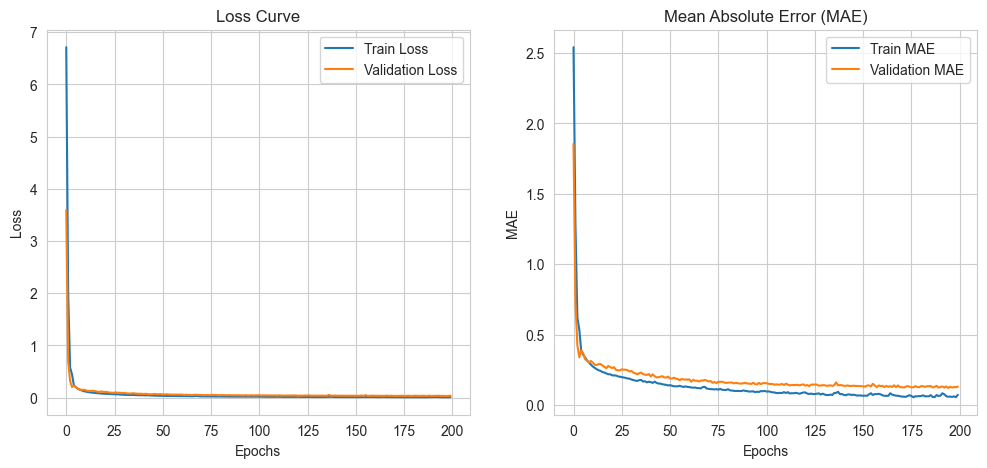

In [89]:
# Ye graph batayega ki model ka loss aur error kaise kam ho raha hai training ke dauraan.
# Ye graph check karega ki model overfitting toh nahi kar raha!

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(History_4.history['loss'], label='Train Loss')
plt.plot(History_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot MAE Curve
plt.subplot(1, 2, 2)
plt.plot(History_4.history['mae'], label='Train MAE')
plt.plot(History_4.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()

plt.show()

In [90]:
# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_4.flatten()

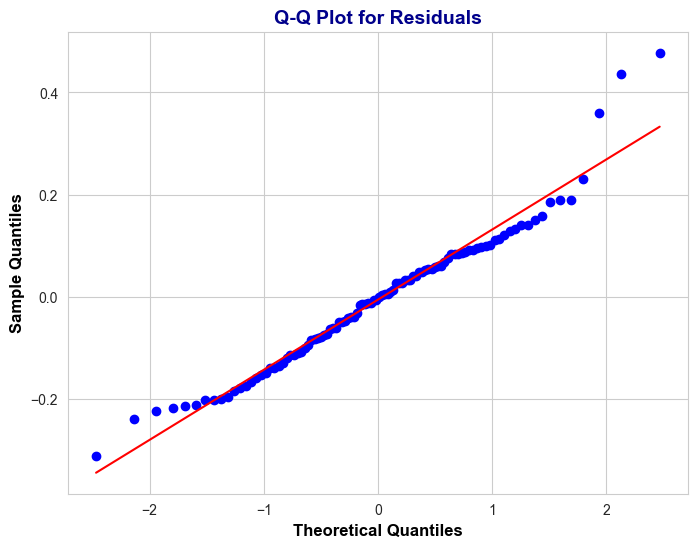

In [91]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create the Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)

# Enhance aesthetics
plt.title("Q-Q Plot for Residuals", fontsize=14, fontweight='bold', color="darkblue")
plt.xlabel("Theoretical Quantiles", fontsize=12, fontweight='bold', color="black")
plt.ylabel("Sample Quantiles", fontsize=12, fontweight='bold', color="black")

# Show the plot
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


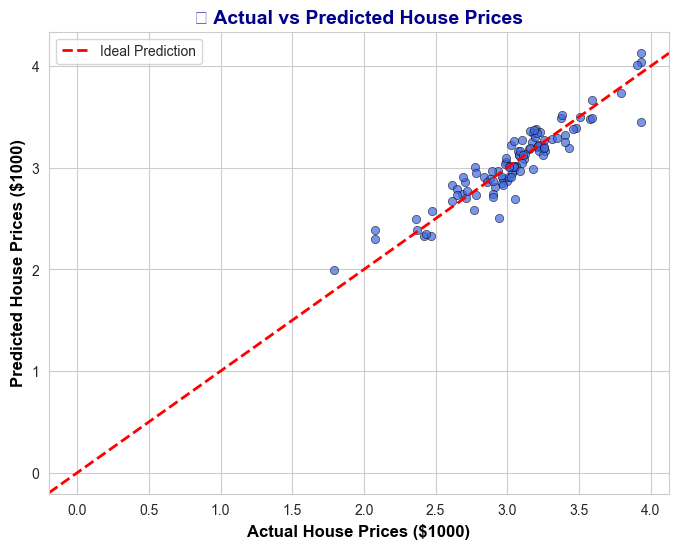

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make Predictions on Test Data
y_pred_4 = model_4.predict(X_test).flatten()  # Ensure it's 1D

# Set Seaborn Style
sns.set_style("whitegrid")

# Create Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_4, color="royalblue", edgecolor="black", alpha=0.7)

# Perfect Prediction Line
plt.axline([0, 0], slope=1, color='red', linestyle='dashed', linewidth=2, label="Ideal Prediction")

# Labels & Title with Styling
plt.xlabel("Actual House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Predicted House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Actual vs Predicted House Prices", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

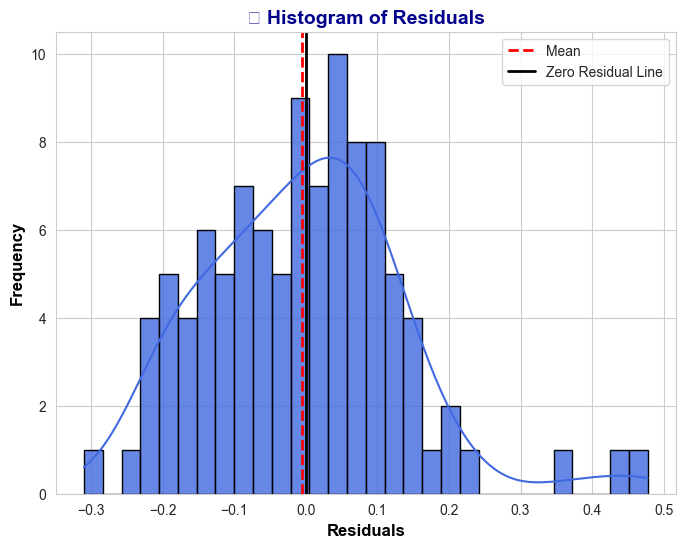

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_4.flatten()

# Set Seaborn Style
sns.set_style("whitegrid")

# Create Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.8)

# Add Mean & Zero Line
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(0, color='black', linestyle='solid', linewidth=2, label="Zero Residual Line")

# Labels & Title with Styling
plt.xlabel("Residuals", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Frequency", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Histogram of Residuals", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

In [94]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Define the Neural Network Model
model_5 = Sequential([
    Dense(256, activation=None, input_shape=(X_train.shape[1],)),  # More neurons
    LeakyReLU(alpha=0.1),
    Dense(128, activation=None),
    LeakyReLU(alpha=0.1),
    Dense(64, activation=None),
    LeakyReLU(alpha=0.1),
    Dense(1)
])

# Lower learning rate
optimizer = Adam(learning_rate=0.0003)  # Lower than previous 0.0005

# Compile the model
model_5.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
History_5 = model_5.fit(
    X_train, y_train,
    epochs=300, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate on test data
test_loss, test_mae = model_5.evaluate(X_test, y_test)

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 8.9075 - mae: 2.9463 - val_loss: 6.5713 - val_mae: 2.5373
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.8922 - mae: 2.3806 - val_loss: 3.7765 - val_mae: 1.9005
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1321 - mae: 1.6779 - val_loss: 1.3927 - val_mae: 1.0929
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1226 - mae: 0.9014 - val_loss: 0.4040 - val_mae: 0.5103
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5515 - mae: 0.6091 - val_loss: 0.2779 - val_mae: 0.4299
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4292 - mae: 0.5398 - val_loss: 0.2456 - val_mae: 0.4035
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3238 - mae: 0.4592 - val_loss: 0.2363 - val_mae: 0.4006
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2582 - mae: 0.4118 - val_loss: 0.2184 - val_mae: 0.3819
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss

In [95]:
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Test Loss: 0.0269292201846838, Test MAE: 0.1175973117351532


In [96]:
# Prediction
y_pred_5 = model_5.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [97]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred_5)
print("New R² Score:", r2)

New R² Score: 0.8058421031296283


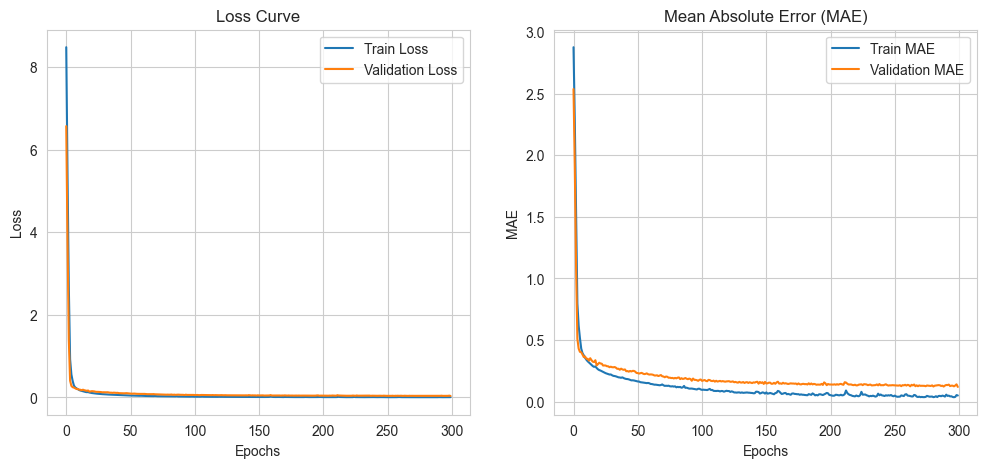

In [98]:
# Ye graph batayega ki model ka loss aur error kaise kam ho raha hai training ke dauraan.
# Ye graph check karega ki model overfitting toh nahi kar raha!

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(History_5.history['loss'], label='Train Loss')
plt.plot(History_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot MAE Curve
plt.subplot(1, 2, 2)
plt.plot(History_5.history['mae'], label='Train MAE')
plt.plot(History_5.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()

plt.show()

In [99]:
# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_5.flatten()

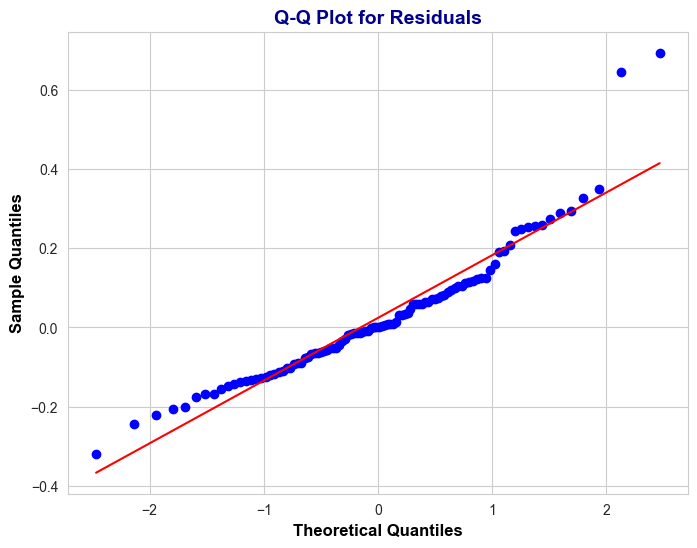

In [100]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create the Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)

# Enhance aesthetics
plt.title("Q-Q Plot for Residuals", fontsize=14, fontweight='bold', color="darkblue")
plt.xlabel("Theoretical Quantiles", fontsize=12, fontweight='bold', color="black")
plt.ylabel("Sample Quantiles", fontsize=12, fontweight='bold', color="black")

# Show the plot
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


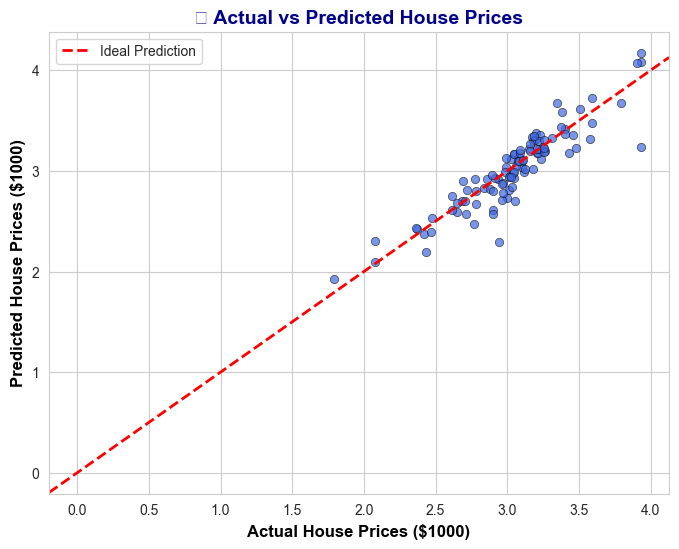

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make Predictions on Test Data
y_pred_5 = model_5.predict(X_test).flatten()  # Ensure it's 1D

# Set Seaborn Style
sns.set_style("whitegrid")

# Create Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_5, color="royalblue", edgecolor="black", alpha=0.7)

# Perfect Prediction Line
plt.axline([0, 0], slope=1, color='red', linestyle='dashed', linewidth=2, label="Ideal Prediction")

# Labels & Title with Styling
plt.xlabel("Actual House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Predicted House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Actual vs Predicted House Prices", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

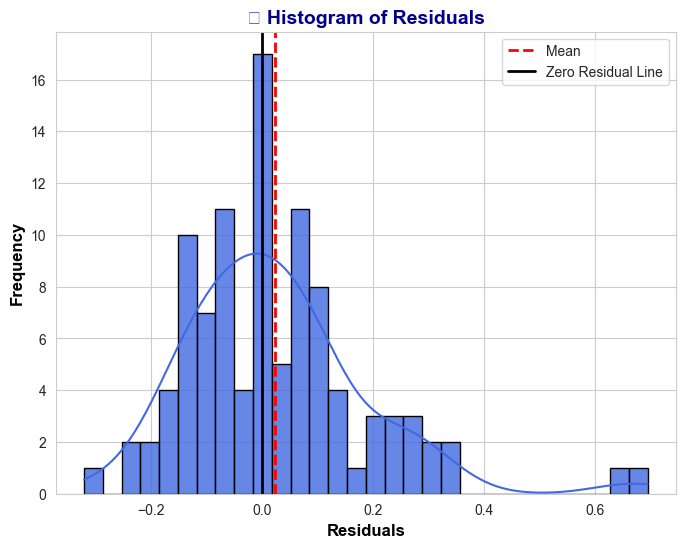

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_5.flatten()

# Set Seaborn Style
sns.set_style("whitegrid")

# Create Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.8)

# Add Mean & Zero Line
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(0, color='black', linestyle='solid', linewidth=2, label="Zero Residual Line")

# Labels & Title with Styling
plt.xlabel("Residuals", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Frequency", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Histogram of Residuals", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

In [1]:
import statsmodels.api as sm

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1️⃣ Residuals vs. Time (Index Plot)
sns.scatterplot(x=np.arange(len(residuals)), y=residuals, ax=axes[0], color='dodgerblue', alpha=0.7, edgecolor='black')
axes[0].axhline(0, color='red', linestyle='dashed', linewidth=1.5)  # Reference line
axes[0].set_xlabel("Observation Index")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Time (Random Pattern Check)")

# 2️⃣ Autocorrelation (ACF Plot)
sm.graphics.tsa.plot_acf(residuals, ax=axes[1], color='blue', lags=30, alpha=0.05)
axes[1].set_title("Autocorrelation of Residuals (ACF Plot)")

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

# Anderson-Darling & Kolmogorov-Smirnov Test ka Code 🚀
## Jab dataset bada ho (n > 5000) ya Shapiro-Wilk test fail ho raha ho, tab Anderson-Darling test ya Kolmogorov-Smirnov test better choice hai.

## Anderson-Darling Test

In [ ]:
# Statistic < Critical Value → Residuals normal hain ✅
# Statistic > Critical Value → Residuals normal nahi hain ❌

from scipy.stats import anderson

result = anderson(residuals, dist='norm')  # Normality check
print(f"Anderson-Darling Test Statistic: {result.statistic}")

# Critical values and significance level check
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% significance level: Residuals are normally distributed.")
    else:
        print(f"At {sl}% significance level: Residuals are NOT normally distributed.")

## Kolmogorov-Smirnov (KS) Test

In [ ]:
# p-value > 0.05 → Residuals normal hain ✅
# p-value < 0.05 → Residuals normal nahi hain ❌

from scipy.stats import kstest

stat, p_value = kstest(residuals, 'norm')  # Normality check
print(f"Kolmogorov-Smirnov Test p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Residuals are normally distributed (Fail to reject H0)")
else:
    print("Residuals are NOT normally distributed (Reject H0)")

## Best Practice (Auto-Choose Best Test)
### Agar dataset chhota hai, toh Shapiro-Wilk use karein.
### Agar bada dataset hai, toh Anderson-Darling ya Kolmogorov-Smirnov use karein.

In [ ]:
from scipy.stats import shapiro, anderson, kstest

def normality_tests(residuals):
    # Shapiro-Wilk Test (Best for small datasets)
    if len(residuals) < 5000:
        stat, p_value = shapiro(residuals)
        print(f"Shapiro-Wilk Test p-value: {p_value:.4f}")
        if p_value > 0.05:
            print("Residuals are normally distributed (Shapiro)")
        else:
            print("Residuals are NOT normally distributed (Shapiro)")
    else:
        print("Dataset is large, using Anderson-Darling & Kolmogorov-Smirnov test...")

        # Anderson-Darling Test
        result = anderson(residuals, dist='norm')
        print(f"Anderson-Darling Test Statistic: {result.statistic}")
        for i in range(len(result.critical_values)):
            sl, cv = result.significance_level[i], result.critical_values[i]
            if result.statistic < cv:
                print(f"At {sl}% significance level: Residuals are normally distributed.")
            else:
                print(f"At {sl}% significance level: Residuals are NOT normally distributed.")

        # Kolmogorov-Smirnov Test
        stat, p_value = kstest(residuals, 'norm')
        print(f"Kolmogorov-Smirnov Test p-value: {p_value:.4f}")
        if p_value > 0.05:
            print("Residuals are normally distributed (Kolmogorov-Smirnov)")
        else:
            print("Residuals are NOT normally distributed (Kolmogorov-Smirnov)")

# Example Usage
normality_tests(residuals)

In [103]:
# 1️⃣ Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert X_train to DataFrame for VIF calculation
X_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1), columns=[f'Feature_{i+1}' for i in range(X_train.shape[1])])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# Print VIF values
print(vif_data)

       Feature       VIF
0    Feature_1  1.006222
1    Feature_2  1.003436
2    Feature_3  1.005276
3    Feature_4  1.005048
4    Feature_5  1.009141
5    Feature_6  1.004772
6    Feature_7  1.004444
7    Feature_8  1.004461
8    Feature_9  1.007980
9   Feature_10  1.010402
10  Feature_11  1.004692
11  Feature_12  1.007926


# Save & Load the Model for Future Use

In [104]:
import pickle

# Save the trained model
with open("house_price_model.pkl", "wb") as model_file:
    pickle.dump(model_2, model_file)

print("Model saved successfully using Pickle!")

Model saved successfully using Pickle!


##  Make Predictions on New Data

In [105]:
# Load the model
with open("house_price_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

print("Model loaded successfully!")

Model loaded successfully!


In [106]:
# Predict on new data (example)
import numpy as np

new_data = np.array([[0.1, 25, 5.0, 0, 0.5, 6.5, 70, 3.5, 2, 300, 15, 390, 5]])  # Example new input

In [107]:
predicted_price = loaded_model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [108]:
print(f"Predicted House Price: ${predicted_price[0][0]*1000:.2f}")

Predicted House Price: $283031.31


## Step 2: Create a Python Script (app.py)
### Save this as app.py

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle  # To load the trained model
from sklearn.preprocessing import StandardScaler

# Load the trained Random Forest model (Ensure you have saved it using pickle)
with open("random_forest_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Load the trained scaler
with open("scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

# Define input fields
st.title("🏡 House Price Prediction")
st.write("Enter the details below to predict the house price:")

# User input fields
CRIM = st.number_input("CRIM (Crime rate per capita)", min_value=0.0, format="%.5f")
ZN = st.number_input("ZN (Proportion of land for large lots)", min_value=0.0, format="%.2f")
INDUS = st.number_input("INDUS (Non-retail business area)", min_value=0.0, format="%.2f")
CHAS = st.selectbox("CHAS (Bound river)", [0, 1])  # Dropdown for binary variable
NOX = st.number_input("NOX (Nitric oxides concentration)", min_value=0.0, format="%.3f")
RM = st.number_input("RM (Average rooms per dwelling)", min_value=1.0, format="%.2f")
AGE = st.number_input("AGE (Old houses proportion)", min_value=0.0, format="%.2f")
DIS = st.number_input("DIS (Distance to employment centers)", min_value=0.0, format="%.2f")
RAD = st.number_input("RAD (Accessibility to highways)", min_value=1, max_value=24, step=1)
TAX = st.number_input("TAX (Property tax rate per $10,000)", min_value=100, format="%d")
PTRATIO = st.number_input("PTRATIO (Pupil-teacher ratio)", min_value=0.0, format="%.2f")
B = st.number_input("B (Proportion of Black population)", min_value=0.0, format="%.2f")
LSTAT = st.number_input("LSTAT (% lower status population)", min_value=0.0, format="%.2f")

# Predict button
if st.button("Predict Price 💰"):
    # Create input array
    input_data = np.array([[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]])

    # Scale input data
    input_scaled = scaler.transform(input_data)

    # Predict house price
    prediction = model.predict(input_scaled)

    st.success(f"🏠 Estimated House Price: ${prediction[0] * 1000:,.2f}")

## Step 3: Save Your Trained Model
### Before running the app, save your trained Random Forest model using pickle:

In [ ]:
import pickle

# Assuming `Model_rf` is your trained model and `scaler` is your trained StandardScaler
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(Model_rf, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

## Step 4: Run Streamlit Locally
### In the terminal, run:

In [ ]:
streamlit run app.py

## Create a new Python script (public.py)
### Save this as public.py:

In [ ]:
from pyngrok import ngrok
import os

# Start Streamlit in background
os.system("streamlit run app.py &")

# Create public URL using ngrok
public_url = ngrok.connect(8501).public_url
print(f"🔗 Public URL: {public_url}")

### Run the script

In [ ]:
python public.py

In [109]:
def build_model(hp):
    # Build the neural network with hyperparameter tuning
    model_6 = Sequential()
    # First hidden layer with tunable neurons
    model_6.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                     activation='relu', input_shape=(X_train.shape[1],)))
    
    # Second hidden layer
    model_6.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                     activation='relu'))
    
    # Output layer
    model_6.add(Dense(1))  # Regression output
    
    # Compile with a tunable learning rate
    model_6.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mse',
        metrics=['mae'] )
    
    return model_6

In [110]:
# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=3,  # Number of model evaluations for each trial
    directory='my_tuner_dir',
    project_name='house_price_prediction' )

Reloading Tuner from my_tuner_dir\house_price_prediction\tuner0.json


In [111]:
# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

In [112]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best Hyperparameters: {best_hps.values}")

Best Hyperparameters: {'units_1': 64, 'units_2': 64, 'optimizer': 'rmsprop'}


In [113]:
# Train a final model: Use the best hyperparameters to train a new model on the entire training dataset (without validation split). 
# This will give you a final model that you can use for predictions.

best_model = tuner.hypermodel.build(best_hps)
History_6 = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.8871 - mae: 2.4758 - val_loss: 2.1181 - val_mae: 1.3086
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7334 - mae: 1.1305 - val_loss: 0.6414 - val_mae: 0.6655
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6718 - mae: 0.6744 - val_loss: 0.2919 - val_mae: 0.4135
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2982 - mae: 0.4358 - val_loss: 0.1797 - val_mae: 0.3225
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2042 - mae: 0.3541 - val_loss: 0.1504 - val_mae: 0.2951
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1745 - mae: 0.3305 - val_loss: 0.1457 - val_mae: 0.3008
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1358 - mae: 0.2900 - val_loss: 0.1148 - val_mae: 0.2608
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1228 - mae: 0.2846 - val_loss: 0.1071 - val_mae: 0.2498
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0

In [114]:
# Evaluate the final model: Evaluate the performance of the final model on the test dataset.

# Evaluate the model after training
test_loss, test_mae = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0241 - mae: 0.1217
Test Loss: 0.026907410472631454, Test MAE: 0.1270628422498703


In [115]:
# Make predictions
predictions = best_model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [116]:
# Calculate R² Score
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better model

R² Score: 0.8060


In [117]:
# Convert y_test to numpy array
y_test_np = y_test.to_numpy().flatten()  # Ensures it's 1D
y_pred_np = predictions.flatten()  # Flatten predicted values if needed

# Display first 5 predictions
for i in range(5):
    print(f'Predicted: {y_pred_np[i]:.4f}, Actual: {y_test_np[i]:.4f}')

Predicted: 3.3112, Actual: 3.2027
Predicted: 3.4608, Actual: 3.5086
Predicted: 2.8300, Actual: 2.6810
Predicted: 3.1255, Actual: 3.1697
Predicted: 2.7639, Actual: 2.8391


In [118]:
# Get the tuning results
results = tuner.results_summary()

Results summary
Results in my_tuner_dir\house_price_prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 1 summary
Hyperparameters:
units_1: 64
units_2: 64
optimizer: rmsprop
Score: 0.13437886784474054

Trial 0 summary
Hyperparameters:
units_1: 128
units_2: 32
optimizer: adam
Score: 0.17361306150754294

Trial 4 summary
Hyperparameters:
units_1: 64
units_2: 128
optimizer: adam
Score: 0.2010731448729833

Trial 2 summary
Hyperparameters:
units_1: 32
units_2: 64
optimizer: rmsprop
Score: 0.21495443085829416

Trial 3 summary
Hyperparameters:
units_1: 32
units_2: 32
optimizer: adam
Score: 0.35052122672398883


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


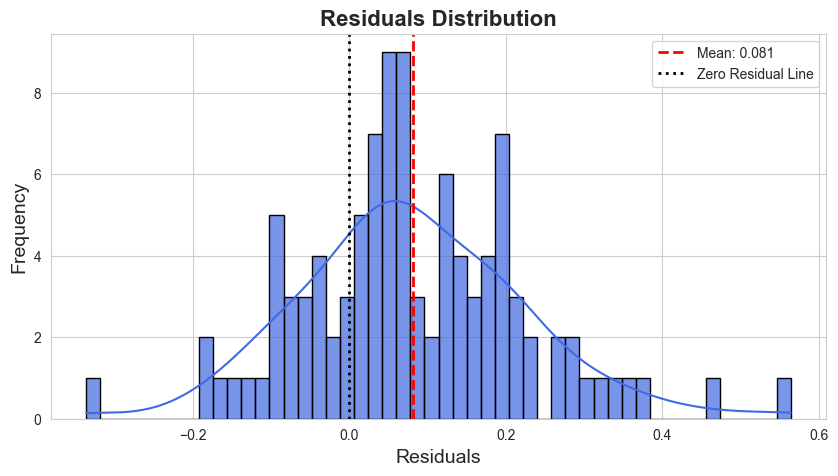

In [119]:
# Residuals distribution: This plot shows the distribution of the residuals (actual values - predicted values).


# Apply Seaborn style
sns.set_style("whitegrid")

# Ensure y_test and predictions are both 1D arrays
y_pred = best_model.predict(X_test).flatten()  
residuals = y_test - y_pred  

# Plot the residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Add mean and zero line for reference
plt.axvline(x=residuals.mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {residuals.mean():.3f}")
plt.axvline(x=0, color='black', linestyle='dotted', linewidth=2, label="Zero Residual Line")

# Titles and labels
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Residuals Distribution", fontsize=16, fontweight='bold')

# Show legend
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


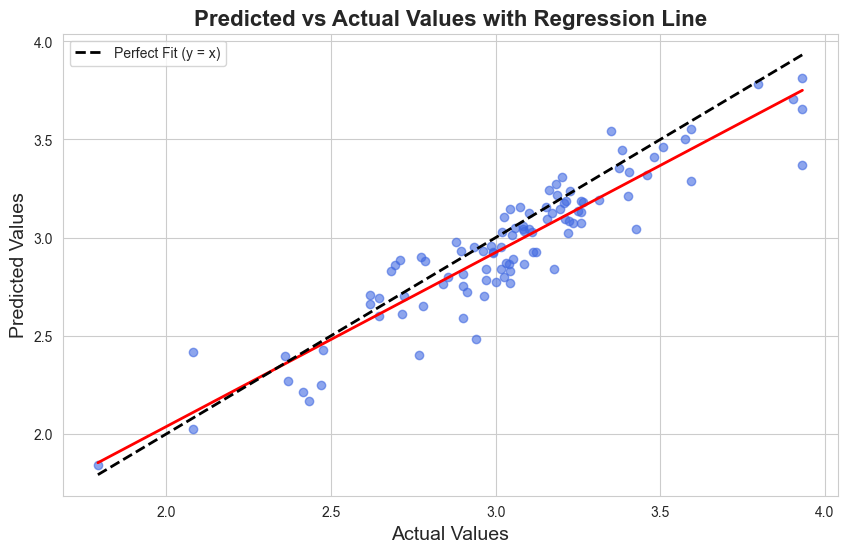

In [120]:
# Predicted vs actual values with regression line: This shows the relationship between predicted values and actual values with a regression line.
# Plot the predicted values vs the actual values with a regression line

# Apply seaborn style
sns.set_style("whitegrid")

# Ensure predictions are 1D
y_pred = best_model.predict(X_test).flatten()

# Plot regression line with scatter points
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "royalblue", "alpha": 0.6}, 
            line_kws={"color": "red", "linewidth": 2}, ci=None)

# Add y = x reference line (perfect predictions)
max_val = max(y_test.max(), y_pred.max())  
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'black', linestyle='dashed', linewidth=2, label="Perfect Fit (y = x)")

# Titles and labels
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Predicted vs Actual Values with Regression Line", fontsize=16, fontweight="bold")

# Show legend
plt.legend()
plt.show()